### Código para ejemplificar cómo genera curvas de luz el modelo Mandel-Agol
Curvas sin ruido ("perfectas")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy
from PyAstronomy.modelSuite.XTran import forTrans as ft

kepler_delta = 0.020433587455414834

In [2]:
# Create MandelAgolLC object with
# circular orbit and quadratic limb darkening
#ma = ft.MandelAgolLC(orbit="circular", ld="quad")
ma = ft.mandelAgol.MandelAgolLC(orbit="circular", ld="quad")

# See the available parameters and their current values
ma.parameterSummary()

# Set parameters
ma["per"] = 0.2
ma["i"] = 90.0
ma["a"] = 6.5
ma["T0"] = 0.0
ma["p"] = 0.16
ma["linLimb"] = 0.47
ma["quadLimb"] = 0.24
ma["b"] = 0.

# Choose some time axis
time = np.linspace(0, 0.5, 1000)

# ... and calculate model
y = ma.evaluate(time)

# Let's see what happened ...
plt.plot(time, y, 'b.')
plt.show()


PyARequiredImport: 
---------------------
A PyA error occurred:
---------------------
Type of error: PyA import error
What happened?
    Could not import required shared object library 'occultquad.so'
What are possible solutions?
  - Use 'pip install PyAstronomy_ext' to get it.
  - Invoke PyA's install script (setup.py) with the --with-ext option.
  - Go to 'forTrans' directory of PyAstronomy and invoke
    f2py -c occultquad.pyf occultquad.f


In [10]:
#generar sobre alguna curva?
folder = "../../KOI_Data/"
df_meta = pd.read_csv(folder+"/koi_metadata.csv")

#semi major axis de aca es en Unidades astronomicas, no en Stellar radius
metadata_MA_needed = ["NExScI Disposition",
                      "Period","Duration", "Semi-major Axis", "a/R", "Time of Transit Epoch","r/R",
                     "Inclination","Impact Parameter",
                      "Limb Darkening Coeff1", "Limb Darkening Coeff2", "Planet Radius"]

df_meta[metadata_MA_needed]

NExScI Disposition      Period  Duration  Semi-major Axis      a/R  \
0             CONFIRMED    8.884923   2.07004            0.079   36.466   
1        FALSE POSITIVE    5.092465   3.65900            0.052   10.670   
2        FALSE POSITIVE  275.073650   3.37000            0.789  512.000   
3        FALSE POSITIVE    8.460439   4.73492            0.075   14.087   
4             CANDIDATE   21.761298   1.24300            0.140  137.070   
5             CANDIDATE    4.287467   1.56930            0.050   19.940   
6        FALSE POSITIVE    0.539366   5.43400            0.017    1.012   
7        FALSE POSITIVE   36.267167   2.06500            0.182  134.100   
8             CANDIDATE    4.298920   2.74700            0.049    3.810   
9        FALSE POSITIVE  161.788327   5.31000            0.607  289.800   
10            CONFIRMED    9.931463   5.67800            0.091   13.607   
11            CANDIDATE    4.578344   3.98700            0.055    8.653   
12       FALSE POSITIVE    1.592633   5.56050            0.023    2.316   
13       FALSE POSITIVE    1.592634   8.94880            0.029    2.046   
14       FALSE POSITIVE    2.222729   2.61700            0.051    6.410   
15       FALSE POSITIVE   14.022451   8.08619            0.114   14.778   
16       FALSE POSITIVE    3.003180   2.81400            0.045    2.640   
17       FALSE POSITIVE    2.252418   1.97670            0.027    7.320   
18            CANDIDATE    0.629001   1.26300            0.016    3.610   
19            CANDIDATE    4.537021   1.81300            0.049   14.160   
20            CANDIDATE    0.977311   1.40300            0.018    5.430   
21            CONFIRMED   21.853629   3.43900            0.151   37.000   
22            CONFIRMED   13.060794   3.21500            0.107   22.290   
23       FALSE POSITIVE   86.723653   4.85200            0.380  105.100   
24            CANDIDATE    1.419758   1.42900            0.025    5.930   
25            CANDIDATE    3.449281   1.42400            0.043   15.980   
26       FALSE POSITIVE  569.934135   4.19040            1.317  759.000   
27            CANDIDATE  330.025002   6.65900            1.107  286.000   
28       FALSE POSITIVE    1.975209   1.51300            0.033    8.400   
29            CONFIRMED    5.791799   3.47400            0.065    6.070   
...                 ...         ...       ...              ...      ...   
8024          CONFIRMED   21.300205   4.08520            0.156   40.659   
8025          CANDIDATE    6.079946   2.70600            0.068   17.210   
8026          CANDIDATE    1.407020   1.37660            0.023    7.817   
8027          CONFIRMED    8.047277   5.15900            0.077    5.050   
8028          CANDIDATE    8.276603   4.83400            0.094   10.240   
8029     FALSE POSITIVE   44.145798   4.08800            0.237  114.650   
8030     FALSE POSITIVE   44.145990   3.40150            0.258   49.100   
8031     FALSE POSITIVE    1.411627   1.08140            0.026    5.710   
8032     FALSE POSITIVE  234.524445   3.90000            0.689  328.000   
8033     FALSE POSITIVE   41.077590   6.20583            0.200   62.976   
8034     FALSE POSITIVE   41.077297   5.52500            0.214   58.580   
8035          CONFIRMED   12.611904   5.14970            0.106   17.270   
8036          CANDIDATE    6.830062   3.31500            0.068   15.950   
8037     FALSE POSITIVE    2.709570   5.57527            0.043    2.706   
8038     FALSE POSITIVE  462.463589   5.00700            1.103  673.000   
8039          CANDIDATE   12.636205   3.96100            0.107   24.300   
8040          CANDIDATE  490.639410  16.50000            1.398  230.000   
8041     FALSE POSITIVE    6.905223   3.53300            0.081    5.330   
8042     FALSE POSITIVE  200.721168   9.91000            0.658  154.600   
8043          CONFIRMED  282.525356  10.79650            0.836  212.200   
8044          CONFIRMED   31.827649   1.63900            0.194   97.300   
8045     FALSE POSITIVE    0.8

### With PyAstronomy -- MandelAgol
https://www.hs.uni-hamburg.de/DE/Ins/Per/Czesla/PyA/PyA/modelSuiteDoc/forTrans.html

In [3]:
"""
Orbital model parameters (circular orbit):
        p - Radius ratio between planet and star.
        a - Semi-major axis of planetary orbit [stellar radii].
        i - Inclination of orbit in degrees (90 deg is edge on view).
        T0 - Time offset of transit center.
        per - Period of planetary orbit.
        b - Describes the flux ratio between a stellar companion and the main star (default is 0).
"""
ma = ft.mandelAgol.MandelAgolLC(orbit="circular", ld="quad")

# Set parameters
ma["per"] = 8.8
ma["i"] = 89.89
ma["a"] = 36.466
ma["T0"] = 169.991686  #ver si afecta..
ma["p"] = 0.114

#ma["linLimb"] = 0.47
#ma["quadLimb"] = 0.24

# Choose some time axis
time = np.linspace(0, 100, kepler_delta) #should be readed by Kepler

lc = ma.evaluate(time)
plt.plot(time, y, 'b.')
plt.show()

PyARequiredImport: 
---------------------
A PyA error occurred:
---------------------
Type of error: PyA import error
What happened?
    Could not import required shared object library 'occultquad.so'
What are possible solutions?
  - Use 'pip install PyAstronomy_ext' to get it.
  - Invoke PyA's install script (setup.py) with the --with-ext option.
  - Go to 'forTrans' directory of PyAstronomy and invoke
    f2py -c occultquad.pyf occultquad.f


### With Everest  -- MandelAgol
https://rodluger.github.io/everest/transit.html

In [4]:
import everest
"""
A Mandel-Agol transit model, but with the depth and the duration as primary input variables.
Parameters:	

    time (numpy.ndarray) – The time array
    t0 (float) – The time of first transit in units of BJD - 2454833.
    dur (float) – The transit duration in days. Don’t go too crazy on this one – very small or very large values will break the inverter. Default 0.1
    per (float) – The orbital period in days. Default 3.56789
    depth (float) – The fractional transit depth. Default 0.001
    kwargs (dict) – Any additional keyword arguments, passed directly to pysyzygy.Transit()

Returns The transit model evaluated at the same times as the time array
"""

time = np.arange(0, 30, kepler_delta) #should be readed by Kepler

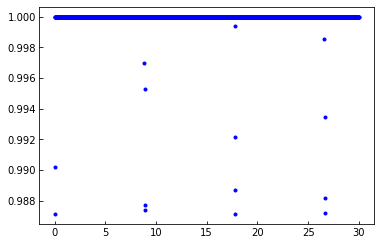

In [5]:
depth = (0.114)**(2) #(r/R)**2
lc_simulated = everest.transit.Transit(time, t0=0.0, per=8.88, dur=2/24, depth=depth)
plt.plot(time, lc_simulated, 'b.') #bien rara la libreria.. probar otra.

### With pysyzygy  -- MandelAgol
https://github.com/rodluger/pysyzygy

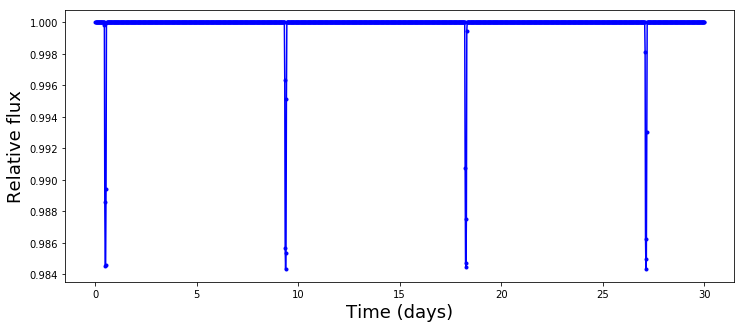

In [4]:
import pysyzygy as ps
"""
- **b** or **bcirc** - The (circular) impact parameter. Default `0.`
    - **MpMs** - The planet-star mass ratio. Default `0.`
    - **per** - The planet orbital period in days. Default `10.`
    - **RpRs** - The planet-star radius ratio. Default `0.1`
    - **rhos** or **aRs** - The stellar density in `g/cm^3` or the semi-major axis-stellar radius ratio. \
                            Default is `rhos = 1.4`, the density of the Sun
    - **ecc** and **w** or **esw** and **ecw** - The eccentricity and the longitude of pericenter in radians, \
                                                 or the two eccentricity vectors. Default is `ecc = 0.` and `w = 0.`
    - **t0** or **times** - The time of first transit, or the time of each of the transits (in case \
                            they are not periodic) in days. Default is `t0 = 0.`
  
    - **ldmodel** - The limb darkening model. Default `ps.QUADRATIC` (only option for now!)
    - **u1** and **u2** or **q1** and **q2** - The quadratic limb darkening parameters (u1, u2) or the \
                                               modified quadratic limb darkening parameters (q1, q2) \
                                               from `Kipping (2013) <http://dx.doi.org/10.1093/mnras/stt1435>`_. \
                                               Default is `u1 = 0.40` and `u2 = 0.26`
    
    - **exptime** - The exposure time in days for binning the model. Default `ps.KEPLONGEXP`
    - **fullorbit** - Compute the orbital parameters for the entire orbit? Only useful if \
                      you're interested in the full arrays of orbital parameters. Default `False`
    - **maxpts** - Maximum number of points in the model. Increase this if you're getting errors. Default `10,000`
    - **exppts** - The number of exposure points per cadence when binning the model. Default `50`
    - **binmethod** - The binning method. Default `ps.RIEMANN` (recommended)
    - **intmethod** - The integration method. Default `ps.SMARTINT` (recommended)
    - **keptol** - The tolerance of the Kepler solver. Default `1.e-15`
    - **maxkepiter** - Maximum number of iterations in the Kepler solver. Default `100`
    - **kepsolver** - The Kepler solver to use. Default `ps.NEWTON` (recommended)

"""
# Instantiate a transit object
model = ps.Transit(per = 8.88, RpRs = 0.114, t0 = 0.5, aRs= 36.466, maxpts=65000, ldmodel=ps.QUADRATIC) 

# Now evaluate the light curve on a grid of observation times
t = np.arange(0., 30, kepler_delta)
lc_simulated = model(t)

# Plot the light curve
plt.figure(figsize = (12, 5))
#fig.subplots_adjust(bottom = 0.15)
plt.plot(t, lc_simulated, 'b.-')
plt.xlabel('Time (days)', fontsize = 18)
plt.ylabel('Relative flux', fontsize = 18)
plt.show()

### With PyTransit
https://github.com/hpparvi/PyTransit

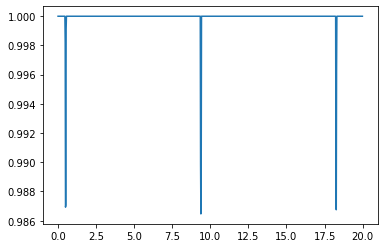

In [3]:
import numpy as np
from pytransit import QuadraticModel
"""
after which it can be evaluated using either a set of scalar arguments
(radius-ratio: k, 
zero-epoch: t0, 
orbital period: p, 
scaled semi-major axis: a,
orbital inclination: i,  -- in radians
eccentricity: e,
argument of periastron: w,
array of limb darkening coefficients ldc
"""
times = np.arange(0., 20, kepler_delta)

#model = QuadraticModel(interpolate=True, klims=(0.01, 0.99))
model = QuadraticModel()
model.set_data(times)

lc_simulated = model.evaluate_ps(k = 0.114, t0=0.5, p=8.88, a=36.466, i=88.89*np.pi/180, e=0, ldc=[0.47,0.24])

plt.plot(times, lc_simulated)
plt.show()

In [12]:
from pytransit import QuadraticModelCL
model = QuadraticModelCL()

model.set_data(times)

lc_simulated = model.evaluate_ps(k = 0.114, t0=0.5, p=8.88, a=36.466, i=88.89*np.pi/180, e=0)

plt.plot(times, lc_simulated)
plt.show()

LogicError: clGetPlatformIDs failed: PLATFORM_NOT_FOUND_KHR

### With batman
https://www.cfa.harvard.edu/~lkreidberg/batman/tutorial.html#initializing-the-model

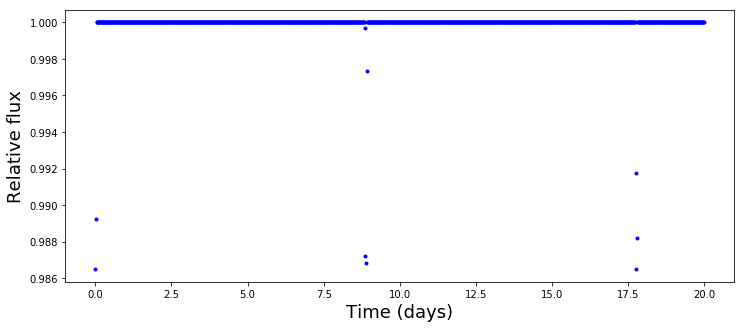

In [46]:
import batman
params = batman.TransitParams()       #object to store transit parameters
params.t0 = 0                        #time of inferior conjunction
params.per = 8.88                       #orbital period
params.rp = 0.114                      #planet radius (in units of stellar radii)--rp/rs
params.a = 36.466                     #semi-major axis (in units of stellar radii) -- el que tengo es AU
params.inc = 88.89                      #orbital inclination (in degrees)
params.limb_dark = "quadratic" #  "quadratic"        #limb darkening model --- que otros hay?
params.u = [0.497, 0.204]      #limb darkening coefficients [u1, u2, u3, u4]

#dont known in kepler
params.ecc = 0.                       #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)

times = np.arange(0, 20, kepler_delta)
m = batman.TransitModel(params, times)    #initializes model
lc_simulated = m.light_curve(params)

# Plot the light curve
plt.figure(figsize = (12, 5))
#fig.subplots_adjust(bottom = 0.15)
plt.plot(times, lc_simulated, 'b.')
plt.xlabel('Time (days)', fontsize = 18)
plt.ylabel('Relative flux', fontsize = 18)
plt.show()

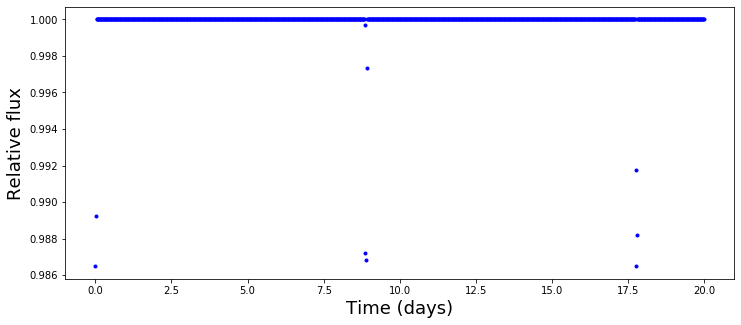

In [3]:
import batman
params = batman.TransitParams()       #object to store transit parameters
params.t0 = 0                        #time of inferior conjunction
params.per = 8.88                       #orbital period
params.rp = 0.114                      #planet radius (in units of stellar radii)--rp/rs
params.a = 36.466                     #semi-major axis (in units of stellar radii) -- el que tengo es AU
params.inc = 88.89                      #orbital inclination (in degrees)
params.limb_dark = "quadratic" #  "quadratic"        #limb darkening model --- que otros hay?
params.u = [0.497, 0.204]      #limb darkening coefficients [u1, u2, u3, u4]

#dont known in kepler
params.ecc = 0.                       #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)

times = np.arange(0, 20, kepler_delta)
m = batman.TransitModel(params, times)    #initializes model
lc_simulated = m.light_curve(params)

# Plot the light curve
plt.figure(figsize = (12, 5))
#fig.subplots_adjust(bottom = 0.15)
plt.plot(times, lc_simulated, 'b.')
plt.xlabel('Time (days)', fontsize = 18)
plt.ylabel('Relative flux', fontsize = 18)
plt.show()

### With PyLightcurve
https://github.com/ucl-exoplanets/pylightcurve

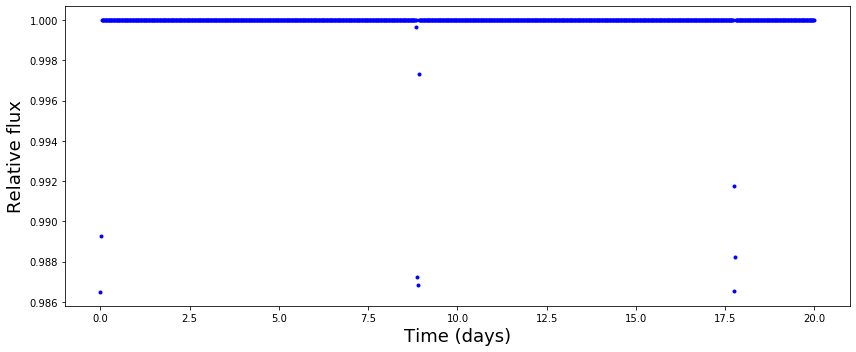

In [13]:
import pylightcurve as plc

"""
    method
    Limb darkening law (str, available methods: 'claret', 'quad', 'sqrt' or 'linear').

    limb_darkening_coefficients
    A list containing the limb darkening coefficients. The list should contain 1 element if the method used is the 'linear', 2 if the method used is the 'quad' or teh 'sqrt', and 4 if the method used is the 'claret'.

    rp_over_rs
    Planetary radius relative to the stellar radius (float, no units)

    period
    Orbital period (float, in days).

    sma_over_rs
    Orbital semi-major axis relative to the stellar radius (float, no units).

    eccentricity
    Orbital eccentricity (float, no units).

    inclination
    Orbital inclination (float, in degrees).

    periastron
    Orbital argument of periastron (float, in degrees).

    mid_time
    Transit mid-time (float, in days). -- creo qu es t0

    time_array
    A time sequence (numpy array, in days).

    precision
    The level of the numerical precision for the calculation (int, 0 to 6, default value is 3).
"""

times = np.arange(0, 20, kepler_delta)

lc_simulated = plc.transit('quad',  #claret son 4 coeficientes.. 'quad' or teh 'sqrt'
                           limb_darkening_coefficients = [0.497, 0.204], 
                           rp_over_rs=0.114, 
                           period= 8.88, 
                           sma_over_rs = 36.466, 
                           inclination=88.89 , 
                           mid_time=0,
                           eccentricity=0,
                           periastron=90.,
                           time_array=times)

plt.figure(figsize = (12, 5))
#fig.subplots_adjust(bottom = 0.15)
plt.plot(times, lc_simulated, 'b.')
plt.xlabel('Time (days)', fontsize = 18)
plt.ylabel('Relative flux', fontsize = 18)
plt.show()

### With KTransit
https://github.com/mrtommyb/ktransit

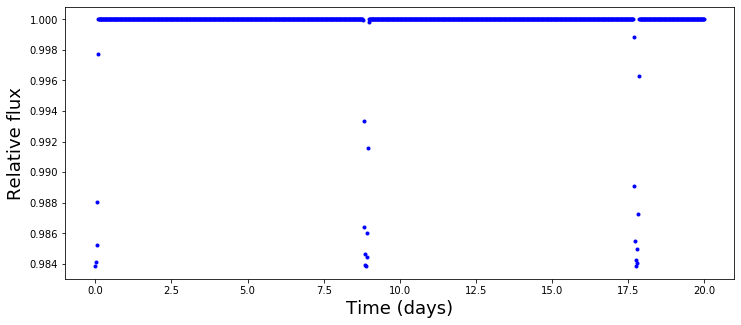

In [2]:
import ktransit

M = ktransit.LCModel()

M.add_star(
        ld1=0.497, # ld1--4 are limb darkening coefficients 
        ld2=0.204, # if only ld1 and ld2 are non-zero then a quadratic limb darkening law is used
        #ld3=0.0, # if all four parameters are non-zero we use non-linear flavour limb darkening
        #ld4=0.0, 
        )
M.add_planet(
        T0=0.0,     # a transit mid-time  
        period=8.88, # an orbital period in days
        impact=0.069, # an impact parameter
        rprs=0.114,   # planet stellar radius ratio  
        #ecosw=0.0,  # eccentricity vector
        #esinw=0.0,
        #occ=0.0)    # a secondary eclipse depth in ppm
)


times = np.arange(0, 20, kepler_delta)

M.add_data(
        time=times,    # timestamps to evaluate the model on
        #itime=np.zeros_like(times)+kepler_delta)      # integration time of each timestamp
)

lc_simulated = M.transitmodel+1 # the out of transit data will be 0.0 unless you specify zpt

plt.figure(figsize = (12, 5))
#fig.subplots_adjust(bottom = 0.15)
plt.plot(times, lc_simulated, 'b.')
plt.xlabel('Time (days)', fontsize = 18)
plt.ylabel('Relative flux', fontsize = 18)
plt.show()

### With TTV2Fast2Furious
https://github.com/shadden/TTV2Fast2Furious

In [20]:
import ttv2fast2furious

In [8]:
import numpy as np
folder_lc = "/work/work_teamEXOPLANET/KOI_LC/"
process_lc = np.load(folder_lc+'/cleaned/LC_kepler_processed.npy')
mandel_lc = np.load(folder_lc+'/npy/KOI_LC_model.npy')
time_lc = np.load(folder_lc+'/npy/KOI_LC_time.npy')

#process_lc = np.nan_to_num(process_lc)

process_lc

array([[-3.34071740e-04, -9.56036533e-04, -3.20341756e-04, ...,
         9.60861553e-05, -4.28106840e-03, -1.24094493e-04],
       [            nan,             nan,             nan, ...,
         2.43145845e-04,  5.07318850e-04,  7.28473887e-04],
       [            nan,             nan,             nan, ...,
        -5.09219964e-04, -6.28478091e-04, -4.82152588e-04],
       ...,
       [-4.26950242e-04,  6.72681813e-04, -5.06025675e-04, ...,
         1.17988662e-04,  5.61176640e-04, -8.82411989e-04],
       [-3.78445133e-04,  7.17432038e-04, -4.64985683e-04, ...,
         1.27586012e-04,  5.71776436e-04, -8.70897239e-04],
       [-1.71322380e-05, -1.38334626e-04,  8.02269873e-04, ...,
         4.07656344e-04, -1.24859904e-03, -4.05257242e-04]])

In [76]:
import matplotlib.pyplot as plt
import os, sys
dirpath = os.getcwd().split("code")[0]+"code/"
sys.path.append(dirpath)
from pre_process import *

def plot_n_lc(time, real_lc, n_sampleds):
    
    for n_sampled in n_sampleds:
        t = time[n_sampled]
        t1 = t[0]
        fluxs = real_lc[n_sampled]
        
        metadata_n = df_meta.iloc[n_sampled]
        
        period = metadata_n["Period"]
        duration = metadata_n["Duration"]/24
        a_R = metadata_n["a/R"]
        t_0 = metadata_n["Time of Transit Epoch"]-t1 #start on 0
        r_R = metadata_n["r/R"]
        inclination = metadata_n["Inclination"]
        u1 = metadata_n["Limb Darkening Coeff1"]
        u2 = metadata_n["Limb Darkening Coeff2"]
        
        model = ps.Transit(per = period, RpRs = r_R, t0 = t_0, u1=u1,u2=u2, aRs= a_R, maxpts=650000) 
        """
        params = batman.TransitParams()       #object to store transit parameters
        params.t0 = t_0                         #time of inferior conjunction
        params.per = period                      #orbital period
        params.rp = r_R                     #planet radius (in units of stellar radii)--rp/rs
        params.a = a_R                     #semi-major axis (in units of stellar radii) 
        params.inc = inclination                      #orbital inclination (in degrees)
        params.limb_dark = "quadratic"        #limb darkening model
        params.u = [0.497, 0.204]      #limb darkening coefficients [u1, u2, u3, u4]
        params.ecc = 0.                       #eccentricity
        params.w = 90.                        #longitude of periastron (in degrees)
        model = batman.TransitModel(params, time[n_sampled])    #initializes model
        
        lc_simulated = model.light_curve(params)
        """
        lc_simulated = model(t-t1) #primer error/contratiempo encontrado (TIEMPO)
        #pre-process simualted
        #lc_simulated = process_found(lc_simulated, plot_show=False, divided=False)
        lc_simulated -=1 #approx the same..

        
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize= (15,5))
        ax1.plot(t,fluxs , 'b.-')
        ax1.set_title("Real")
        ax2.plot(t, lc_simulated, 'b.-')
        ax2.set_title("Simulated")
        plt.show()
        print("----------------------------------------------------------------")
        
        plt.figure(figsize=(15,5))
        plt.plot(t, fluxs, '.-')
        plt.plot(t, lc_simulated, '.-')
        plt.show()

In [77]:
n_sampleds = np.random.randint(0, process_lc.shape[0], size=10)

Raw light curve comparison pre-process simulated
[131.200257  131.2206916 131.2411261 ... 212.8751755 212.895609
 212.9160424]
[0.00000000e+00 2.04346000e-02 4.08691000e-02 ... 8.16749185e+01
 8.16953520e+01 8.17157854e+01]


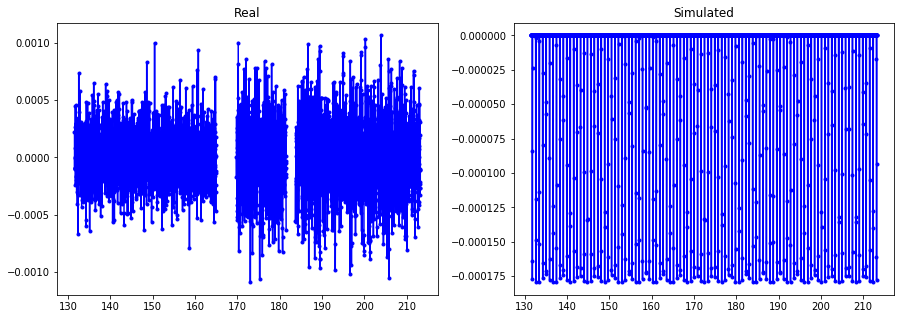

----------------------------------------------------------------


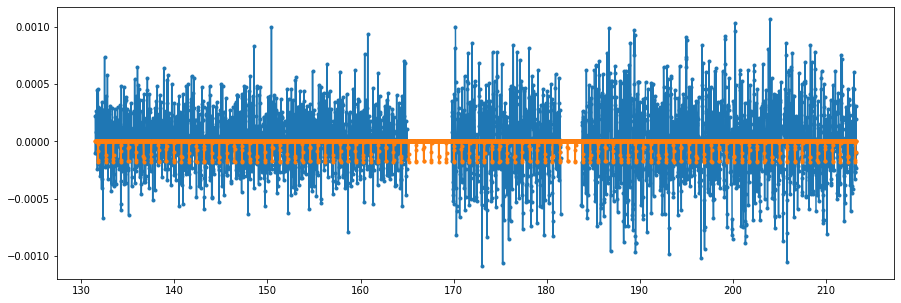

[112.4288    112.4492343 112.4696685 ... 194.1031268 194.1235603
 194.1439937]
[0.00000000e+00 2.04343000e-02 4.08685000e-02 ... 8.16743268e+01
 8.16947603e+01 8.17151937e+01]


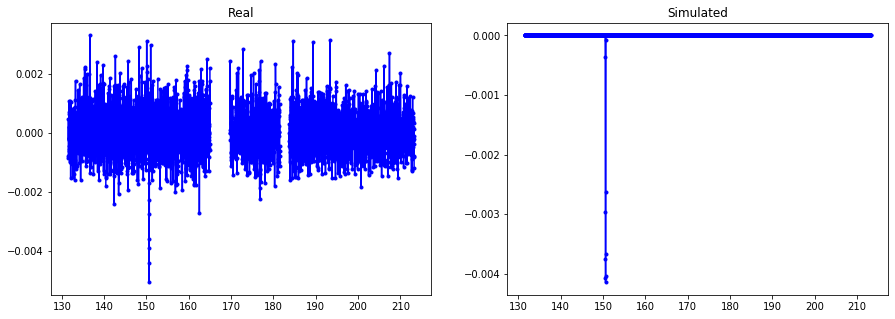

----------------------------------------------------------------


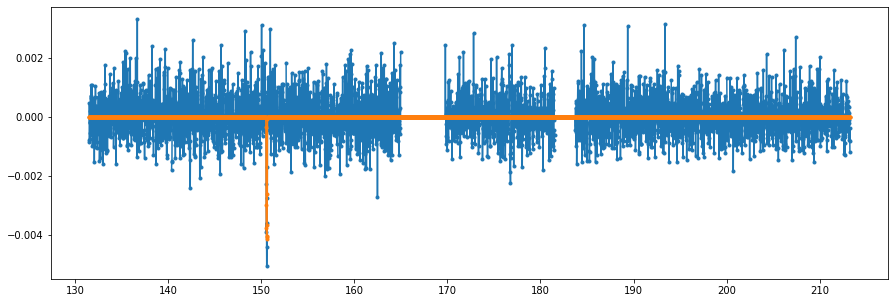

[127.734887  127.7553216 127.7757561 ... 209.4104598 209.4308935
 209.4513272]
[0.00000000e+00 2.04346000e-02 4.08691000e-02 ... 8.16755728e+01
 8.16960065e+01 8.17164402e+01]


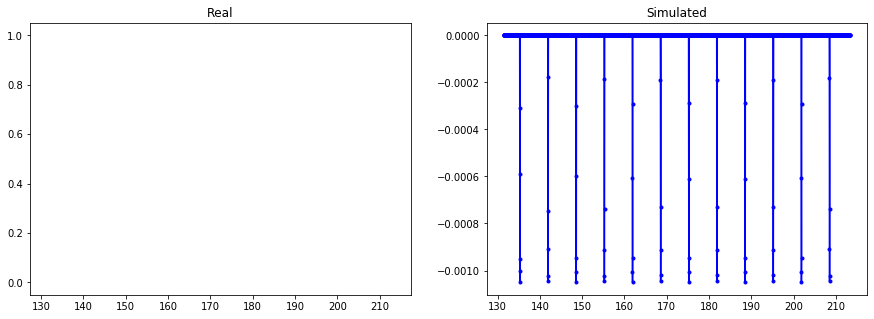

----------------------------------------------------------------


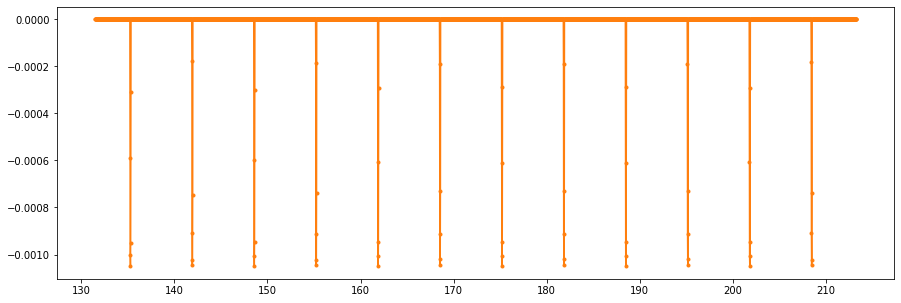

[130.8167286 130.8371631 130.8575974 ... 212.4914719 212.5119054
 212.5323389]
[0.00000000e+00 2.04345000e-02 4.08688000e-02 ... 8.16747433e+01
 8.16951768e+01 8.17156103e+01]


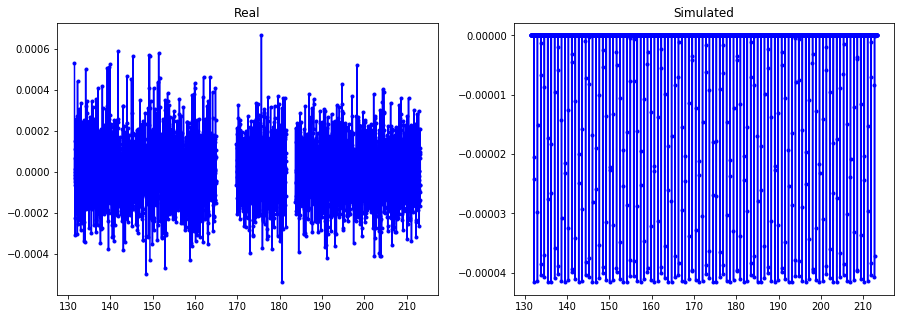

----------------------------------------------------------------


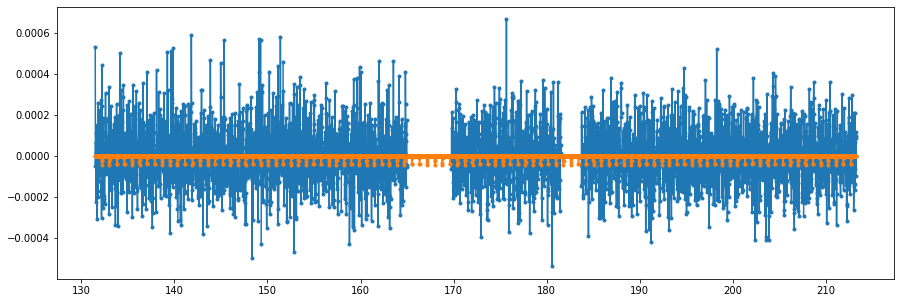

[ 86.9512694  86.971704   86.9921386 ... 168.6269791 168.6474129
 168.6678465]
[0.00000000e+00 2.04346000e-02 4.08692000e-02 ... 8.16757097e+01
 8.16961435e+01 8.17165771e+01]


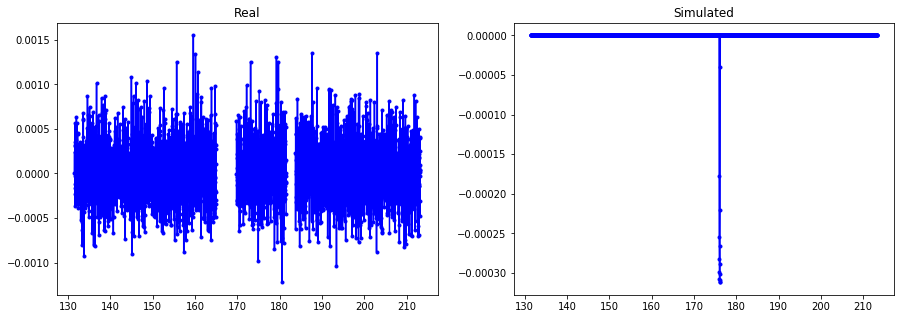

----------------------------------------------------------------


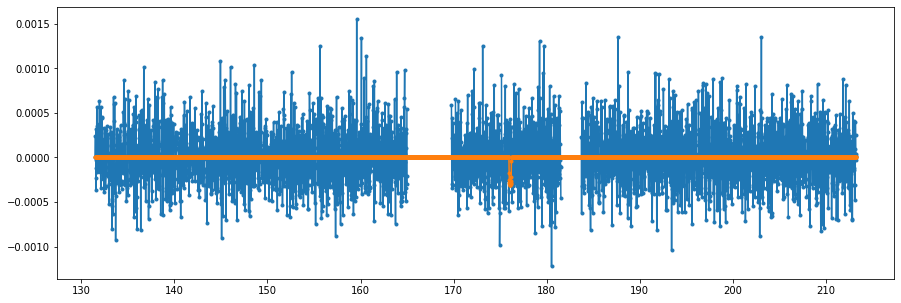

[120.8502252 120.8706598 120.8910943 ... 202.5257067 202.5461404
 202.566574 ]
[0.00000000e+00 2.04346000e-02 4.08691000e-02 ... 8.16754815e+01
 8.16959152e+01 8.17163488e+01]


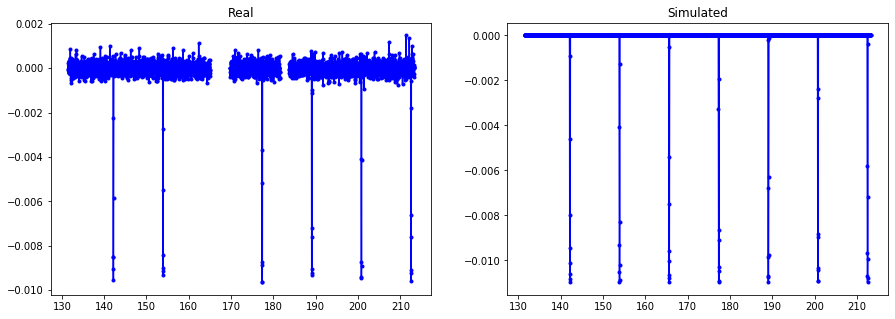

----------------------------------------------------------------


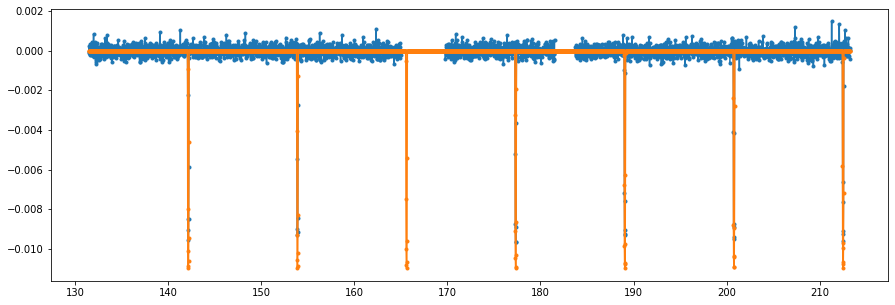

[-43.7432098 -43.7227753 -43.7023409 ...  37.9315177  37.9519512
  37.9723846]
[0.00000000e+00 2.04345000e-02 4.08689000e-02 ... 8.16747275e+01
 8.16951610e+01 8.17155944e+01]


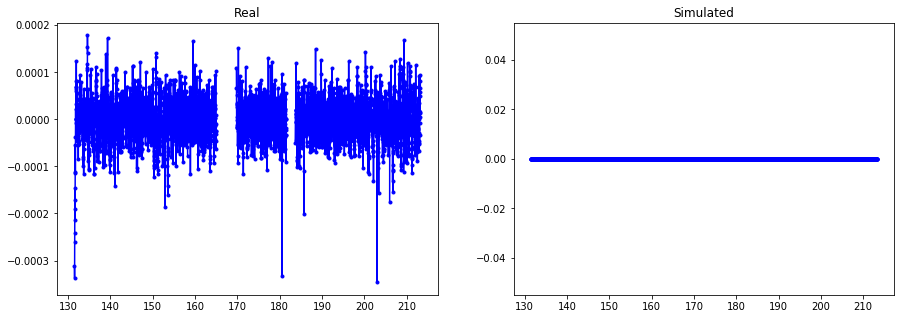

----------------------------------------------------------------


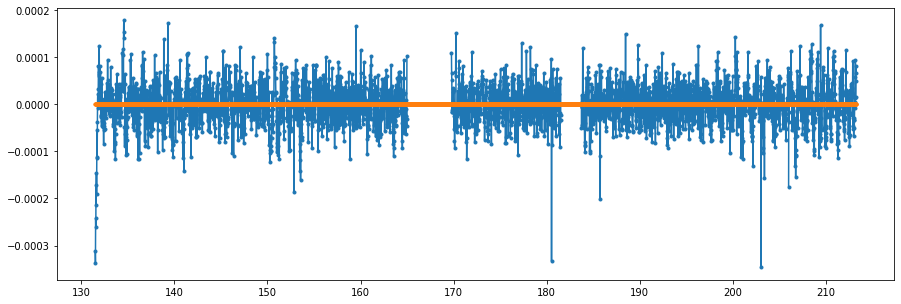

[120.7103208 120.7307553 120.7511897 ... 202.3850064 202.4054399
 202.4258733]
[0.00000000e+00 2.04345000e-02 4.08689000e-02 ... 8.16746856e+01
 8.16951191e+01 8.17155525e+01]


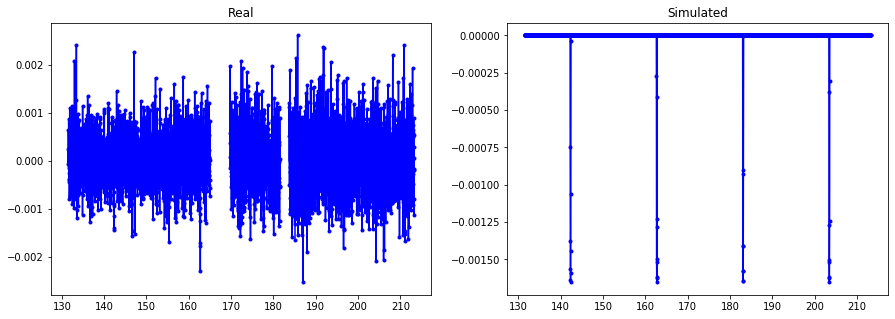

----------------------------------------------------------------


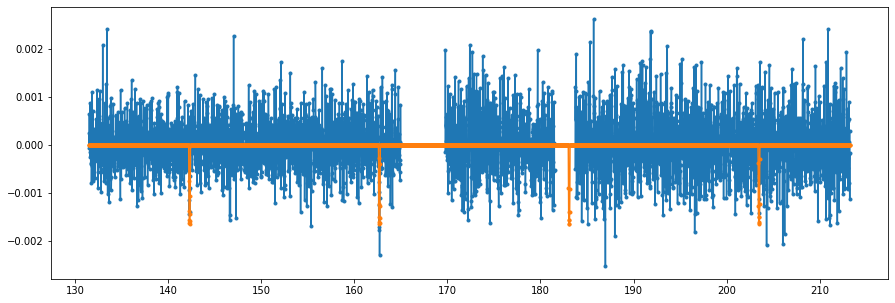

[119.286747  119.3071817 119.3276163 ... 200.962547  200.9829808
 201.0034145]
[0.00000000e+00 2.04347000e-02 4.08693000e-02 ... 8.16758000e+01
 8.16962338e+01 8.17166675e+01]


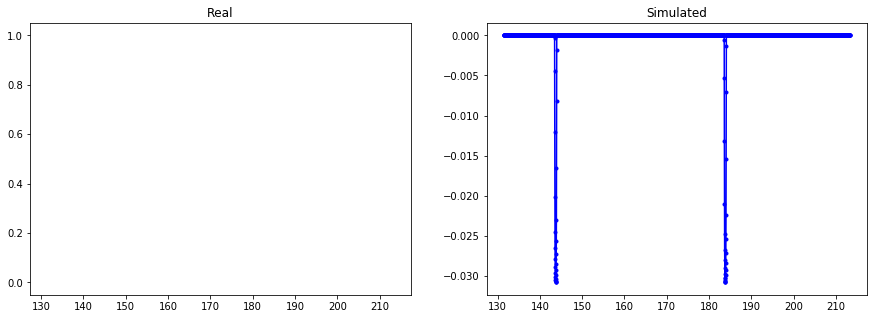

----------------------------------------------------------------


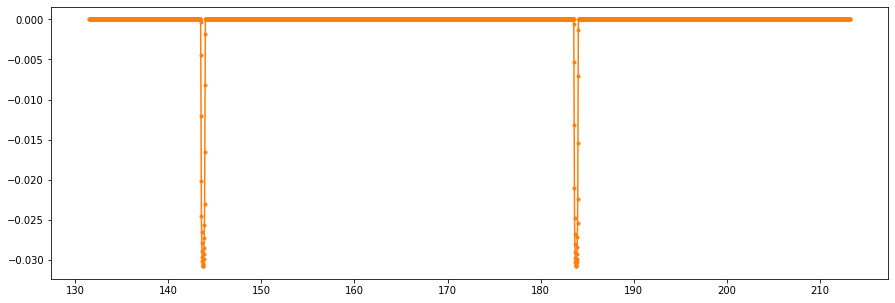

[ 89.165471   89.1859054  89.2063397 ... 170.8403047 170.8607384
 170.8811719]
[0.00000000e+00 2.04344000e-02 4.08687000e-02 ... 8.16748337e+01
 8.16952674e+01 8.17157009e+01]


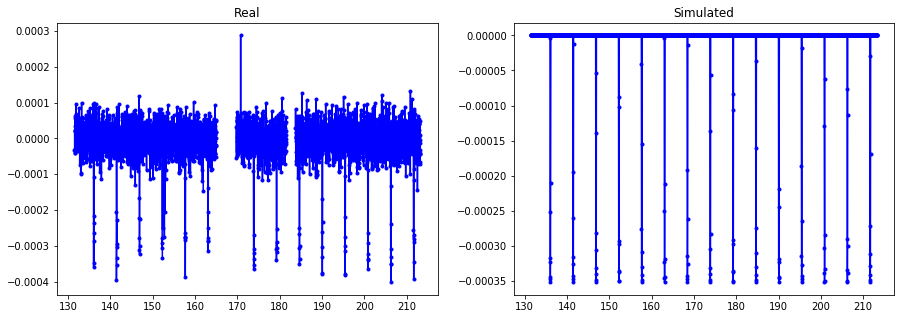

----------------------------------------------------------------


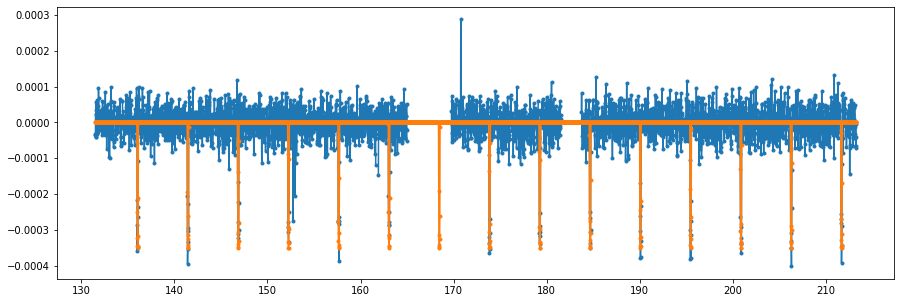

In [78]:
print("Raw light curve comparison pre-process simulated")
plot_n_lc(time_lc[:,:4000], process_lc[:,:4000], n_sampleds )

Raw light curve comparison


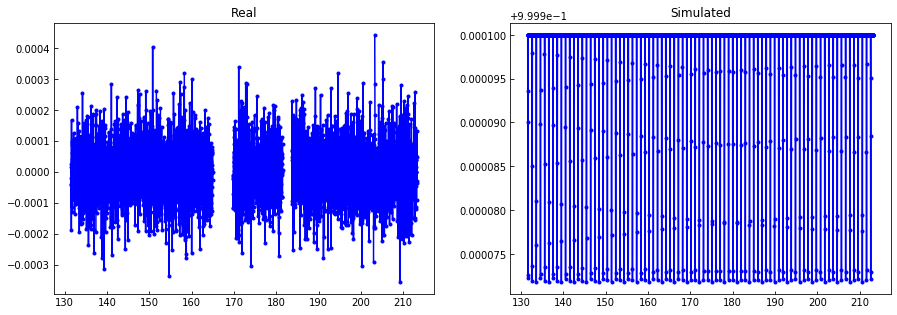

----------------------------------------------------------------


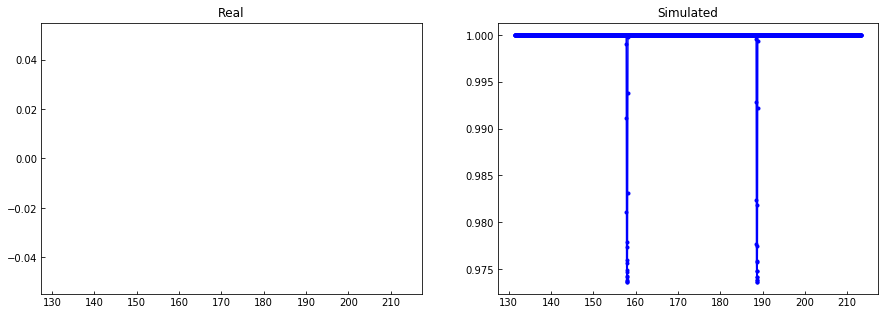

----------------------------------------------------------------


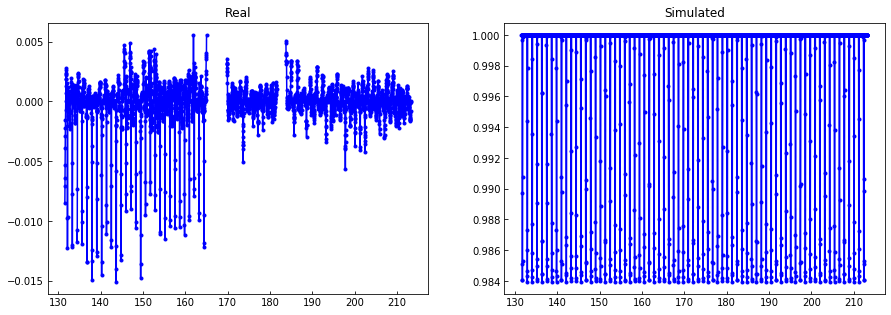

----------------------------------------------------------------


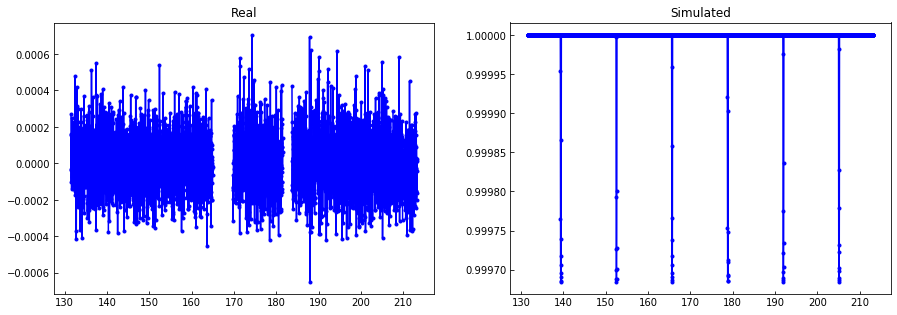

----------------------------------------------------------------


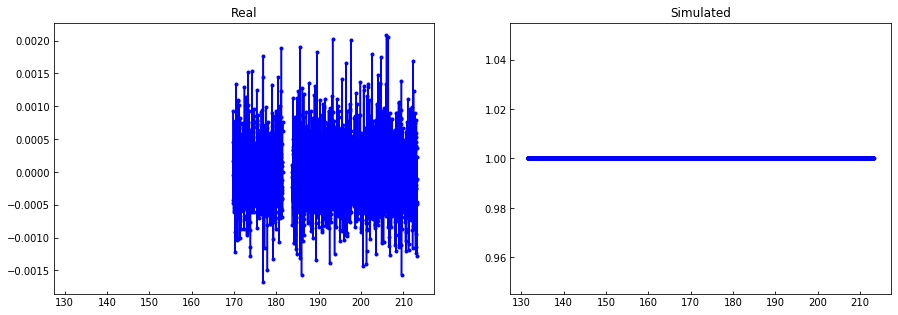

----------------------------------------------------------------


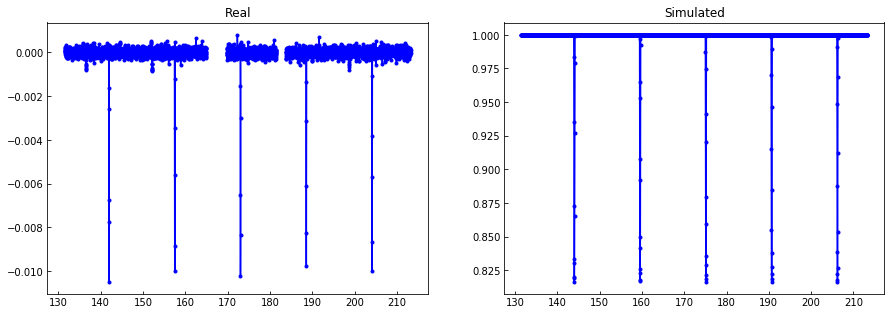

----------------------------------------------------------------


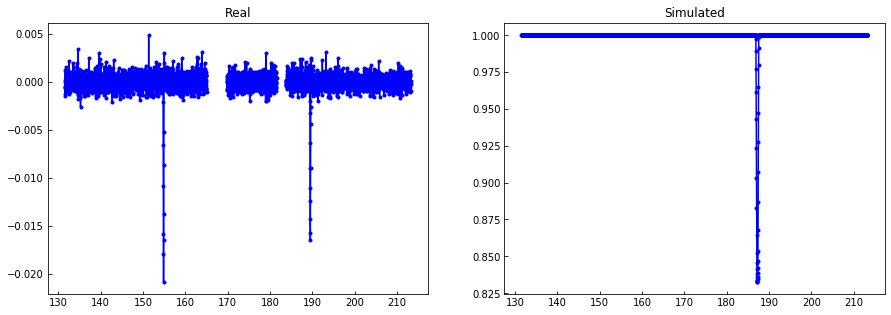

----------------------------------------------------------------


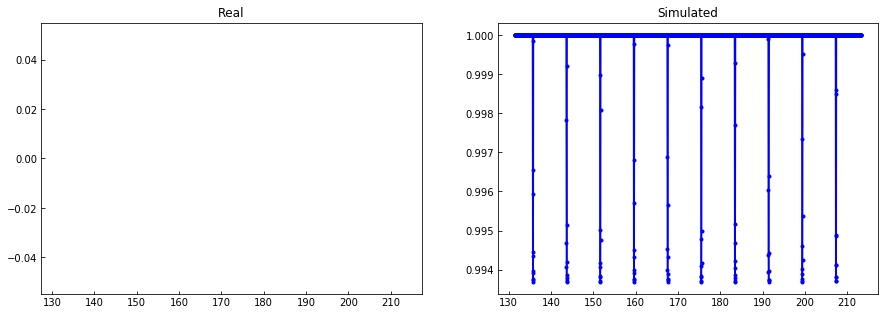

----------------------------------------------------------------


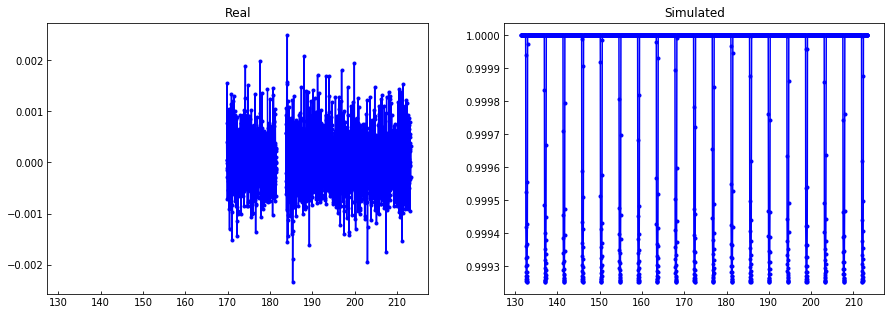

----------------------------------------------------------------


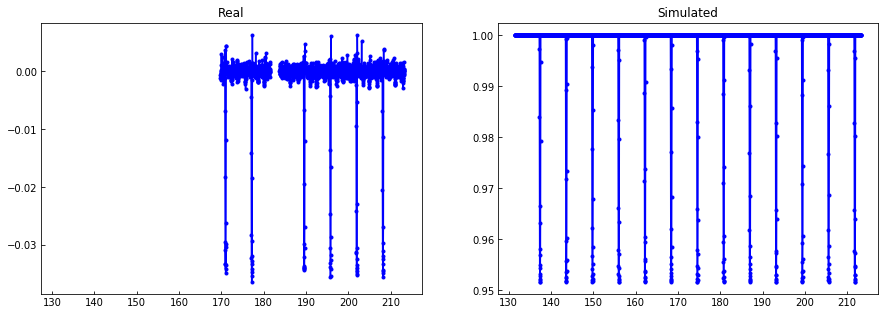

----------------------------------------------------------------


In [83]:
print("Raw light curve comparison")
plot_n_lc(time_lc[:,:4000], process_lc[:,:4000], n_sampleds )

Mandel-Agol of Kepler againts ours comparison


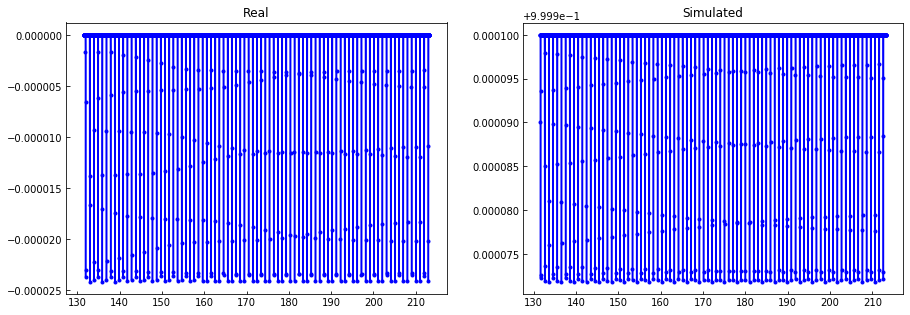

----------------------------------------------------------------


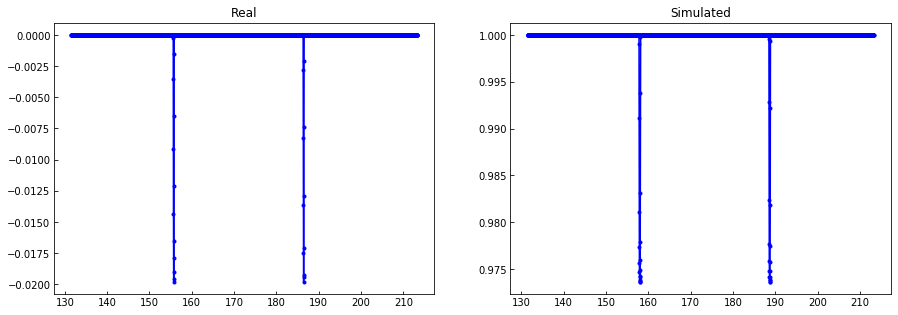

----------------------------------------------------------------


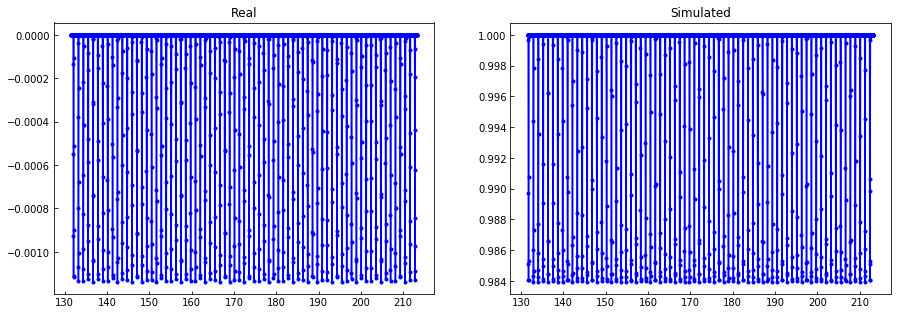

----------------------------------------------------------------


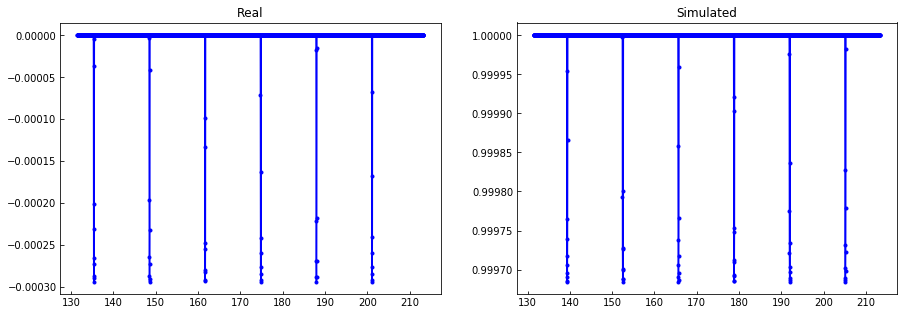

----------------------------------------------------------------


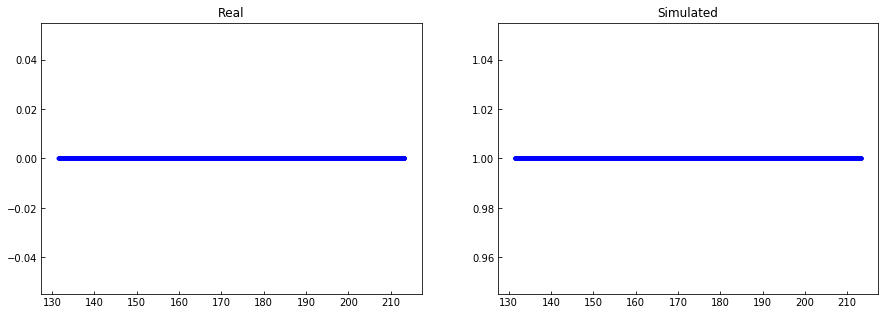

----------------------------------------------------------------


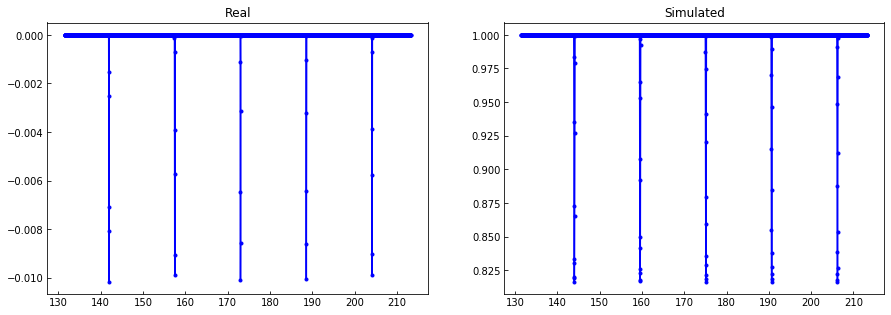

----------------------------------------------------------------


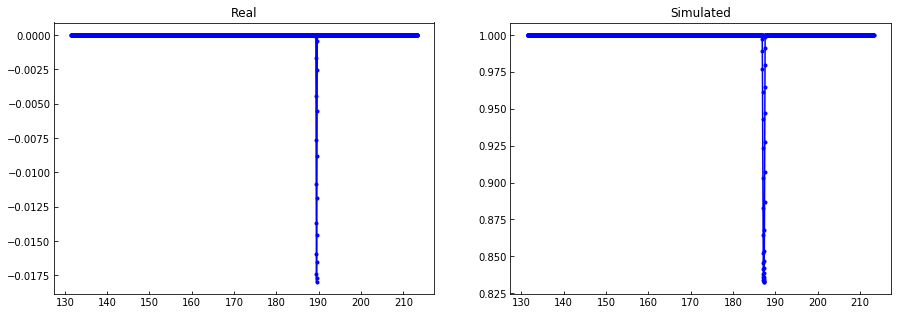

----------------------------------------------------------------


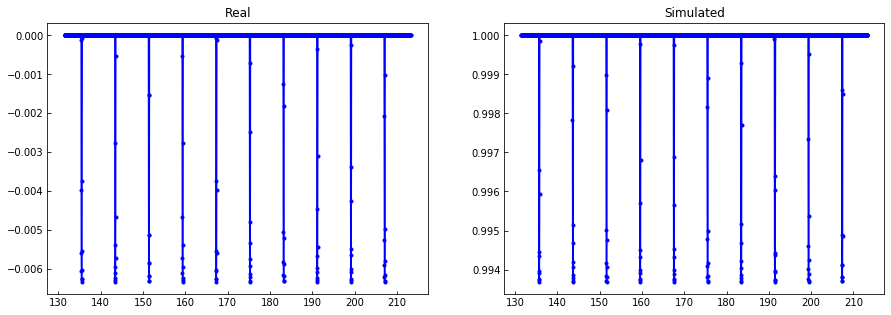

----------------------------------------------------------------


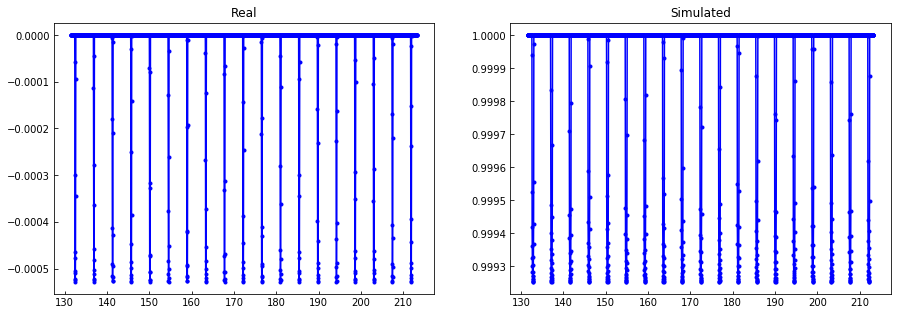

----------------------------------------------------------------


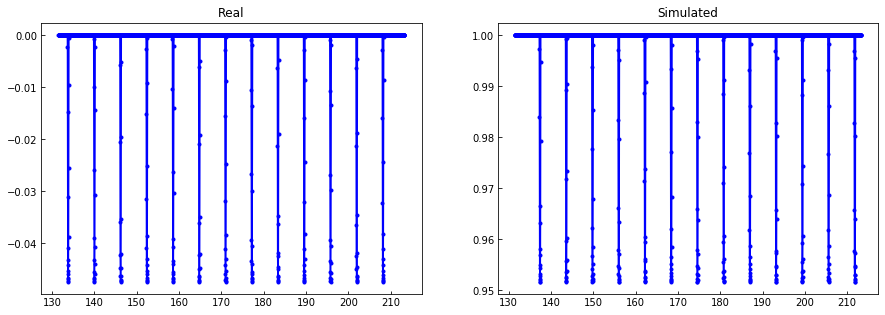

----------------------------------------------------------------


In [84]:
print("Mandel-Agol of Kepler againts ours comparison")
plot_n_lc(time_lc[:,:4000], mandel_lc[:,:4000], n_sampleds )

## FIT ON FOLD LIGHT CURVEs

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os,sys, gc, keras, time
from IPython.display import display

dirpath = os.getcwd().split("code")[0]+"code/"
sys.path.append(dirpath)
from pre_process import clean_LC,generate_representation
from evaluation import calculate_metrics, evaluate_metadata, evaluate_metadata_raw

folder = "../../KOI_Data/"
folder_lc = "/work/work_teamEXOPLANET/KOI_LC/"

T = 300
X_fold_lc = np.load("data/LC_global_%dT.npy"%T)
#X_fold_lc_aug = np.load("data/LC_globalA_%dT.npy"%T)
X_fold_time = np.load("data/Time_global_%dT.npy"%T)


mask_transit = np.load("data/mask_transit_LC.npy")  #
X_fold_lc_tr = X_fold_lc[mask_transit]
X_fold_time_tr = X_fold_time[mask_transit]
N,T = X_fold_lc_tr.shape

X_fold_time_tr = np.cumsum(X_fold_time_tr, axis=1)

print("X train shape: ",X_fold_lc_tr.shape)
print("X train time shape: ",X_fold_time_tr.shape)

Using TensorFlow backend.


X train shape:  (4317, 300)
X train time shape:  (4317, 300)


In [7]:
K = 0 #repetir transito K veces

new_X = []
new_X_T = []
for i in range(N):
    new_X.append(np.pad(X_fold_lc_tr[i], pad_width= (0,K*T), mode='wrap'))
    new_X_T.append(np.pad(X_fold_time_tr[i], pad_width = (0, K*T),mode='reflect', reflect_type='odd'))
new_X = np.asarray(new_X)
new_X_T = np.asarray(new_X_T) #+20000
new_X.shape

(4317, 300)

In [8]:
def impute_on_pandas(df):
    return df.fillna(df.median(),inplace=False)

df_meta = pd.read_csv(folder+"/kepler_dataset.csv")
all_labels = df_meta["NExScI Disposition"].values
mask_conf = (all_labels=="CONFIRMED")
mask_fp = (all_labels=="FALSE POSITIVE")
mask_cand = (all_labels=="CANDIDATE")

#dividir duration por 24??
df_meta["Duration"] = df_meta["Duration"]/24

#df_meta["Time of Transit Epoch"] = df_meta["Time of Transit Epoch"]- time_kepler[:,0] #modificacion

cand_nans = np.any(pd.isna(df_meta[mask_cand]))
if cand_nans:
    print("Candidatos tienen nans")
    df_meta[mask_cand] = df_meta[mask_cand].fillna(df_meta[mask_cand].median(),inplace=False)

cand_fp = np.any(pd.isna(df_meta[mask_fp]))
if cand_fp:
    print("Falsos positivos tienen nans")
    df_meta[mask_fp] = df_meta[mask_fp].fillna(df_meta[mask_fp].median(),inplace=False)

cand_conf = np.any(pd.isna(df_meta[mask_conf]))
if cand_conf:
    print("Confirmados tienen nans")
    df_meta[mask_conf] = df_meta[mask_conf].fillna(df_meta[mask_conf].median(),inplace=False)
    
df_meta = df_meta[mask_transit]
df_meta.head()

Candidatos tienen nans


/opt/ohpc/pub/moduledeps/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Falsos positivos tienen nans
Confirmados tienen nans


Kepler ID   KOI Name  Kepler Name  KOI Number Kepler Disposition  \
0     757450  K00889.01  Kepler-75 b      889.01          CANDIDATE   
1     892772  K01009.01          NaN     1009.01     FALSE POSITIVE   
4    1026957  K00958.01          NaN      958.01          CANDIDATE   
5    1161345  K00984.01          NaN      984.01          CANDIDATE   
7    1293046  K07622.01          NaN     7622.01     FALSE POSITIVE   

  NExScI Disposition    RA (J2000)  RA Error   Dec (J2000)  Dec Error  ...  \
0          CONFIRMED  19 24 33.024       0.0  +36 34 38.57        0.0  ...   
1     FALSE POSITIVE  19 24 36.811       0.0  +36 40 43.83        0.0  ...   
4          CANDIDATE  19 25 01.078       0.0  +36 44 37.00        0.0  ...   
5          CANDIDATE  19 24 11.712       0.0  +36 50 23.58        0.0  ...   
7     FALSE POSITIVE  19 24 06.372       0.0  +36 54 58.93        0.0  ...   

   Contamination Flag  Insolation Flux  Insolation Flux err1  \
0                   0            83.21                 16.69   
1                   0           119.70                 48.69   
4                   0            13.18                  3.00   
5                   0           186.31                 56.73   
7                   0             3.44                  0.94   

   Insolation Flux err2  Fitted Stellar Density  Fitted Stellar Density err1  \
0                -13.87                11.62061                      0.20683   
1                -36.91                 0.88510                      0.10080   
4                 -1.98               102.86534                      5.47239   
5                -28.39                 8.16471                      4.69586   
7                 -0.97                34.69388                     13.11193   

   Fitted Stellar Density err2  Planetary Fit  Disposition Score  \
0                     -0.40258        LS+MCMC              0.999   
1                     -0.39457        LS+MCMC              0.000   
4                    -30.25813        LS+MCMC              1.000   
5                     -1.63188        LS+MCMC              0.711   
7                    -21.13275        LS+MCMC              0.000   

                               File Name  
0  kplr000757450-20160128150956_dvt.fits  
1  kplr000892772-20160128150956_dvt.fits  
4  kplr001026957-20160128150956_dvt.fits  
5  kplr001161345-20160128150956_dvt.fits  
7  kplr001293046-20160128150956_dvt.fits  

[5 rows x 153 columns]

### TLS
https://transitleastsquares.readthedocs.io/en/latest/Python%20interface.html

In [241]:
from transitleastsquares import transitleastsquares as TLS

def fit_TLS(time, lc, U, P):
    TLS_mod = TLS(time, lc +1 ) #lc +1??
    return TLS_mod.power(show_progress_bar=True, transit_template="default", #could be box
                         per = P ,
                         period = P,
                         T0 = P/2 ,
                         period_min = 1 , 
                         period_max = 50 ,
                         n_transits_min = 1,
    oversampling_factor=10,
    duration_grid_step=1.02,
                         limb_dark='quadratic', u=U) #u default of library  
    
    #precision_needed = 1e-3 
    #freqs = np.arange(1/2000, 1/1e-1, precision_needed )
    #periods = 1 / freqs
    #return TLS_mod.power(period_min=periods.min(), period_max=periods.max(), show_progress_bar=True)

In [242]:
results = fit_TLS(new_X_T[0], new_X[0] , P = 5 , U= [0.4804, 0.1867] )
results





  0%|          | 0/1374 periods | 00:00<?

Transit Least Squares TLS 1.0.25 (04 June 2020)
Creating model cache for 139 durations
Searching 300 data points, 1374 periods from 1.001 to 4.428 days
Using all 12 CPU threads






  0%|          | 1/1374 periods | 00:01<44:11



  5%|▍         | 67/1374 periods | 00:02<29:27



 12%|█▏        | 168/1374 periods | 00:02<19:01



 20%|█▉        | 274/1374 periods | 00:02<12:09



 28%|██▊       | 385/1374 periods | 00:02<07:39Process ForkPoolWorker-356:
Process ForkPoolWorker-362:
Process ForkPoolWorker-358:
Process ForkPoolWorker-363:
Process ForkPoolWorker-359:
Process ForkPoolWorker-357:
Process ForkPoolWorker-355:
Process ForkPoolWorker-360:
Process ForkPoolWorker-364:
Process ForkPoolWorker-361:


KeyboardInterrupt: 

Process ForkPoolWorker-366:
Traceback (most recent call last):
  File "/home/casapanshop/anaconda2/envs/newpy3_tf1/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/casapanshop/anaconda2/envs/newpy3_tf1/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/casapanshop/anaconda2/envs/newpy3_tf1/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/casapanshop/anaconda2/envs/newpy3_tf1/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/casapanshop/anaconda2/envs/newpy3_tf1/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
Traceback (most recent call last):
  File "/home/casapanshop/anaconda2/envs

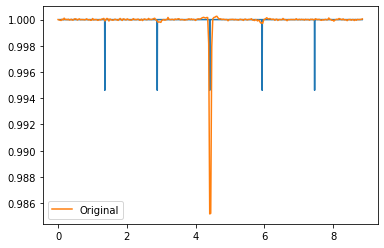

In [195]:
t_MA = results["model_lightcurve_time"]
lc_MA = results["model_lightcurve_model"]
plt.plot(t_MA, lc_MA)
plt.plot(new_X_T[0], new_X[0]+1 , label="Original")
plt.legend()
plt.show()

No handles with labels found to put in legend.


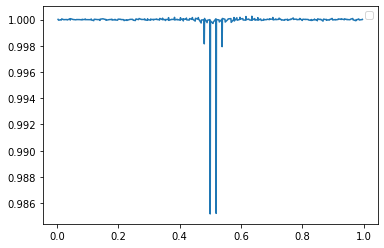

In [196]:
t_MA_fold = results["folded_phase"]
lc_MA_fold = results["folded_y"]
plt.plot(t_MA_fold, lc_MA_fold)
#plt.plot(new_X_T[0], new_X[0]+1 , label="Original")
plt.legend()
plt.show()

No handles with labels found to put in legend.


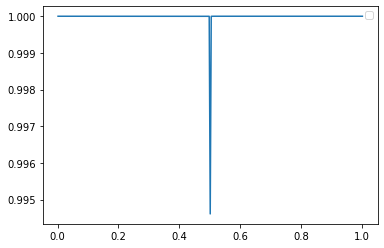

In [198]:
t_MA_fold = results["model_folded_phase"]
lc_MA_fold = results["model_folded_model"]
plt.plot(t_MA_fold, lc_MA_fold)
#plt.plot(new_X_T[0], new_X[0]+1 , label="Original")
plt.legend()
plt.show()

### PyTransit
https://github.com/hpparvi/PyTransit/blob/master/notebooks/01_broadband_parameter_estimation.ipynb

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
from pytransit import QuadraticModel
from pytransit.utils.de import DiffEvol
from pytransit.orbits.orbits_py import as_from_rhop,  i_from_ba
from pytransit.param.parameter import (ParameterSet, GParameter, PParameter, LParameter,
                                       NormalPrior as NP, 
                                       UniformPrior as UP)
from tqdm.auto import tqdm
from numba import njit, prange

@njit(parallel=True, cache=False, fastmath=True)
def lnlike_normal_v(o, m, e):
    m = atleast_2d(m)
    npv = m.shape[0]
    npt = o.size
    lnl = zeros(npv)
    for i in prange(npv):
        for j in range(npt):
            lnl[i] += -log(e[i]) - 0.5*log(2*pi) - 0.5*((o[j]-m[i,j])/e[i])**2
    return lnl

class LPFunction:
    def __init__(self, name: str, times: ndarray = None, fluxes: ndarray = None):
        self.tm = QuadraticModel(klims=(0.05, 0.25), nk=512, nz=512)

        # LPF name
        # --------
        self.name = name
        
        # Declare high-level objects
        # --------------------------
        self.ps = None          # Parametrisation
        self.de = None          # Differential evolution optimiser
        self.sampler = None     # MCMC sampler

        # Initialize data
        # ---------------
        self.times = asarray(times)
        self.fluxes = asarray(fluxes)
        self.tm.set_data(self.times)

        # Define the parametrisation
        # --------------------------
        self.ps = ParameterSet([
            GParameter('tc',  'zero_epoch',       'd',      NP(0.0,  0.1), (-inf, inf)),
            GParameter('pr',  'period',           'd',      NP(1.0, 1e-5), (0,    inf)),
            GParameter('rho', 'stellar_density',  'g/cm^3', UP(0.1, 25.0), (0,    inf)),
            GParameter('b',   'impact_parameter', 'R_s',    UP(0.0,  1.0), (0,      1)),
            GParameter('k2', 'area_ratio', 'A_s', UP(0.05**2, 0.25**2), (0.05**2, 0.25**2)),
            GParameter('q1', 'q1_coefficient', '', UP(0, 1), bounds=(0, 1)),
            GParameter('q2', 'q2_coefficient', '', UP(0, 1), bounds=(0, 1)),
            GParameter('loge', 'log10_error', '', UP(-4, 0), bounds=(-4, 0))])
        self.ps.freeze()

    def create_pv_population(self, npop=50):
        return self.ps.sample_from_prior(npop)
        
    def baseline(self, pv):
        """Multiplicative baseline"""
        return 1.

    def transit_model(self, pv, copy=True):
        pv = atleast_2d(pv)
        
        # Map from sampling parametrisation to the transit model parametrisation
        # ----------------------------------------------------------------------
        pvt = zeros((pv.shape[0], 7))
        pvt[:,0]   = sqrt(pv[:,4])
        pvt[:,1:3] = pv[:,0:2]
        pvt[:,  3] = as_from_rhop(pv[:,2], pv[:,1])
        pvt[:,  4] = i_from_ba(pv[:,3], pvt[:,3])
        
        # Map the limb darkening
        # ----------------------
        ldc = zeros((pv.shape[0],2))
        a, b = sqrt(pv[:,5]), 2.*pv[:,6]
        ldc[:,0] = a * b
        ldc[:,1] = a * (1. - b)
            
        return self.tm.evaluate_pv(pvt, ldc)

    def flux_model(self, pv):
        return self.transit_model(pv) * self.baseline(pv)

    def residuals(self, pv):
        return self.fluxes - self.flux_model(pv)

    def set_prior(self, pid: int, prior) -> None:
            self.ps[pid].prior = prior

    def lnprior(self, pv):
        return self.ps.lnprior(pv)

    def lnlikelihood(self, pv):
        flux_m = self.flux_model(pv)
        wn = 10**(atleast_2d(pv)[:, 7])
        return lnlike_normal_v(self.fluxes, flux_m, wn)

    def lnposterior(self, pv):
        lnp = self.lnprior(pv) + self.lnlikelihood(pv)
        return where(isfinite(lnp), lnp, -inf)

    def __call__(self, pv):
        return self.lnposterior(pv)

    def optimize(self, niter=200, npop=50, population=None, label='Global optimisation', leave=False):
        if self.de is None:
            self.de = DiffEvol(self.lnposterior, clip(self.ps.bounds, -1, 1), npop, maximize=True, vectorize=True)
            if population is None:
                self.de._population[:, :] = self.create_pv_population(npop)
            else:
                self.de._population[:,:] = population
        for _ in tqdm(self.de(niter), total=niter, desc=label, leave=leave):
            pass

    def sample(self, niter=500, thin=5, label='MCMC sampling', reset=True, leave=True):
        if self.sampler is None:
            self.sampler = EnsembleSampler(self.de.n_pop, self.de.n_par, self.lnposterior, vectorize=True)
            pop0 = self.de.population
        else:
            pop0 = self.sampler.chain[:,-1,:].copy()
        if reset:
            self.sampler.reset()
        for _ in tqdm(self.sampler.sample(pop0, iterations=niter, thin=thin), total=niter, desc=label, leave=False):
            pass

    def posterior_samples(self, burn: int=0, thin: int=1):
        fc = self.sampler.chain[:, burn::thin, :].reshape([-1, self.de.n_par])
        return pd.DataFrame(fc, columns=self.ps.names)

    def plot_mcmc_chains(self, pid: int=0, alpha: float=0.1, thin: int=1, ax=None):
        fig, ax = (None, ax) if ax is not None else subplots()
        ax.plot(self.sampler.chain[:, ::thin, pid].T, 'k', alpha=alpha)
        fig.tight_layout()
        return fig

    def plot_light_curve(self, model: str = 'de', figsize: tuple = (13, 4)):
        fig, ax = subplots(figsize=figsize, constrained_layout=True)
        cp = sb.color_palette()

        if model == 'de':
            pv = self.de.minimum_location
            err = 10**pv[7]
        elif model == 'mc':
            fc = array(self.posterior_samples())
            pv = permutation(fc)[:300]
            err = 10**median(pv[:, 7], 0)

        ax.errorbar(self.times, self.fluxes, err, fmt='.', c=cp[4], alpha=0.75)

        if model == 'de':
            ax.plot(self.times, self.flux_model(pv), c=cp[0])
        if model == 'mc':
            flux_pr = self.flux_model(fc[permutation(fc.shape[0])[:1000]])
            flux_pc = array(percentile(flux_pr, [50, 0.15,99.85, 2.5,97.5, 16,84], 0))
            [ax.fill_between(self.times, *flux_pc[i:i+2,:], alpha=0.2,facecolor=cp[0]) for i in range(1,6,2)]
            ax.plot(self.times, flux_pc[0], c=cp[0])
        setp(ax, xlim=self.times[[0,-1]], xlabel='Time', ylabel='Normalised flux')
        return fig, axs

In [6]:
npop, de_iter, mc_reps, mc_iter, thin = 100, 200, 3, 500, 10

lpf = LPFunction('Ks', new_X_T[0], new_X[0])

lpf.optimize(de_iter, npop)

LoweringError: Failed in nopython mode pipeline (step: nopython mode backend)
Failed in nopython mode pipeline (step: convert to parfors)
'NoneType' object is not iterable

File "../../../../../casapanshop/anaconda2/envs/newpy3_tf1/lib/python3.6/site-packages/pytransit/models/numba/ma_quadratic_nb.py", line 710:
def quadratic_model_pv(t, pvp, ldc, lcids, pbids, nsamples, exptimes, npb, edt, ldt, let, kt, zt, interpolate):
    <source elided>

    for ipv in prange(npv):
    ^

[1] During: lowering "id=7[LoopNest(index_variable = parfor_index.147, range = (0, $npv.167, 1))]{256: <ir.Block at /home/casapanshop/anaconda2/envs/newpy3_tf1/lib/python3.6/site-packages/pytransit/models/numba/ma_quadratic_nb.py (715)>, 130: <ir.Block at /home/casapanshop/anaconda2/envs/newpy3_tf1/lib/python3.6/site-packages/pytransit/models/numba/ma_quadratic_nb.py (710)>, 286: <ir.Block at /home/casapanshop/anaconda2/envs/newpy3_tf1/lib/python3.6/site-packages/pytransit/models/numba/ma_quadratic_nb.py (716)>, 304: <ir.Block at /home/casapanshop/anaconda2/envs/newpy3_tf1/lib/python3.6/site-packages/pytransit/models/numba/ma_quadratic_nb.py (719)>, 827: <ir.Block at /home/casapanshop/anaconda2/envs/newpy3_tf1/lib/python3.6/site-packages/pytransit/models/numba/ma_quadratic_nb.py (710)>, 330: <ir.Block at /home/casapanshop/anaconda2/envs/newpy3_tf1/lib/python3.6/site-packages/pytransit/models/numba/ma_quadratic_nb.py (719)>, 340: <ir.Block at /home/casapanshop/anaconda2/envs/newpy3_tf1/lib/python3.6/site-packages/pytransit/models/numba/ma_quadratic_nb.py (720)>, 226: <ir.Block at /home/casapanshop/anaconda2/envs/newpy3_tf1/lib/python3.6/site-packages/pytransit/models/numba/ma_quadratic_nb.py (715)>, 358: <ir.Block at /home/casapanshop/anaconda2/envs/newpy3_tf1/lib/python3.6/site-packages/pytransit/models/numba/ma_quadratic_nb.py (723)>}Var(parfor_index.147, ma_quadratic_nb.py:710)" at /home/casapanshop/anaconda2/envs/newpy3_tf1/lib/python3.6/site-packages/pytransit/models/numba/ma_quadratic_nb.py (710)

In [ ]:
for i in range(mc_reps):
    lpf.sample(mc_iter, thin=thin, reset=True, label='MCMC sampling')



In [ ]:
lpf.plot_light_curve('mc');

### K-transit
https://github.com/mrtommyb/ktransit
> EL MEJOR!

* Parametros de estrella estan fijos (Limb darkenning de modelo cuadratico, incluido el stellar density g/cm^3
* Parámetros de planeta se buscan con prior o first  guess la metadata kepler:
    * mid-transit time (T0) - days
    * Period (days)
    * Impact parameter 
    * Planet radius (over stellar radius)

In [11]:
#codigo para buscar las 10 features desde k transit..

names_m = ['Period', 'Duration', 'Time of Transit Epoch', 'r/R', 'a/R',
       'Inclination', 'Impact Parameter', 'Fitted Stellar Density',
       'Limb Darkening Coeff1', 'Limb Darkening Coeff2']

In [36]:
df_meta

Kepler ID   KOI Name    Kepler Name  KOI Number Kepler Disposition  \
0        757450  K00889.01    Kepler-75 b      889.01          CANDIDATE   
1        892772  K01009.01            NaN     1009.01     FALSE POSITIVE   
4       1026957  K00958.01            NaN      958.01          CANDIDATE   
5       1161345  K00984.01            NaN      984.01          CANDIDATE   
7       1293046  K07622.01            NaN     7622.01     FALSE POSITIVE   
8       1431122  K00994.01            NaN      994.01          CANDIDATE   
10      1432789  K00992.01   Kepler-745 b      992.01          CANDIDATE   
11      1432789  K00992.02            NaN      992.02          CANDIDATE   
14      1434395  K07623.01            NaN     7623.01     FALSE POSITIVE   
18      1575873  K04359.01            NaN     4359.01          CANDIDATE   
19      1717722  K03145.01            NaN     3145.01          CANDIDATE   
20      1717722  K03145.02            NaN     3145.02          CANDIDATE   
21      1718189  K00993.01   Kepler-262 c      993.01          CANDIDATE   
22      1718189  K00993.02   Kepler-262 b      993.02          CANDIDATE   
24      1718958  K04053.01            NaN     4053.01          CANDIDATE   
25      1721157  K04644.01            NaN     4644.01          CANDIDATE   
28      1724513  K04224.01            NaN     4224.01     FALSE POSITIVE   
29      1724719  K04212.01  Kepler-1569 b     4212.01          CANDIDATE   
30      1724719  K04212.02            NaN     4212.02          CANDIDATE   
31      1725016  K01007.01   Kepler-748 b     1007.01          CANDIDATE   
33      1849702  K02538.01            NaN     2538.01          CANDIDATE   
34      1865042  K01002.01   Kepler-746 b     1002.01          CANDIDATE   
38      1871056  K01001.01   Kepler-264 b     1001.01          CANDIDATE   
39      1871056  K01001.02   Kepler-264 c     1001.02          CANDIDATE   
40      1872821  K02351.01            NaN     2351.01          CANDIDATE   
41      1873513  K04928.01  Kepler-1624 b     4928.01          CANDIDATE   
42      1995519  K02634.01  Kepler-1299 b     2634.01          CANDIDATE   
45      1996180  K02534.01  Kepler-1271 b     2534.01          CANDIDATE   
46      1996180  K02534.02            NaN     2534.02          CANDIDATE   
52      2013883  K06258.01            NaN     6258.01     FALSE POSITIVE   
...         ...        ...            ...         ...                ...   
8001   12469800  K02543.01            NaN     2543.01          CANDIDATE   
8004   12470844  K00790.01   Kepler-233 b      790.01          CANDIDATE   
8005   12470844  K00790.02   Kepler-233 c      790.02          CANDIDATE   
8006   12470954  K00439.01   Kepler-554 b      439.01          CANDIDATE   
8008   12505076  K02154.01            NaN     2154.01          CANDIDATE   
8009   12505503  K04190.01  Kepler-1563 b     4190.01          CANDIDATE   
8010   12505654  K02353.01            NaN     2353.01          CANDIDATE   
8011   12506342  K07538.01            NaN     7538.01     FALSE POSITIVE   
8013   12506770  K01577.01   Kepler-895 b     1577.01          CANDIDATE   
8017   12554212  K05974.01            NaN     5974.01          CANDIDATE   
8019   12554634  K04714.01            NaN     4714.01          CANDIDATE   
8022   12557548  K03794.01  Kepler-1520 b     3794.01          CANDIDATE   
8024   12600735  K00548.01   Kepler-596 b      548.01          CANDIDATE   
8025   12600735  K00548.02            NaN      548.02          CANDIDATE   
8026   12602314  K02853.01            NaN     2853.01          CANDIDATE   
8027   12602568  K01583.01   Kepler-897 b     1583.01          CANDIDATE   
8028   12602999  K08082.01            NaN     8082.01          CANDIDATE   
8035   12644822  K00791.01   Kepler-682 b      791.01          CANDIDATE   
8036   12645057  K04497.01            NaN     4497.01          CANDIDATE   
8039   12647577  K04530.01            NaN     4530.01          CANDIDATE   
8043   12735740  K03663.01    Kepler-86 b     3663.01 

In [73]:
df_meta["Duration"]

0       0.086252
1       0.152458
4       0.051792
5       0.065388
7       0.086042
8       0.114458
10      0.236583
11      0.166125
14      0.109042
18      0.052625
19      0.075542
20      0.058458
21      0.143292
22      0.133958
24      0.059542
25      0.059333
28      0.063042
29      0.144750
30      0.267833
31      0.153125
33      0.101750
34      0.075287
38      0.547292
39      0.770958
40      0.135500
41      0.071729
42      0.178458
45      0.125033
46      0.123000
52      0.046625
          ...   
8001    0.057050
8004    0.113521
8005    0.209958
8006    0.091615
8008    0.256333
8009    0.166708
8010    0.033429
8011    0.066750
8013    0.067796
8017    0.088125
8019    0.044208
8022    0.067917
8024    0.170217
8025    0.112750
8026    0.057358
8027    0.214958
8028    0.201417
8035    0.214571
8036    0.138125
8039    0.165042
8043    0.449854
8044    0.068292
8046    0.356500
8047    0.078767
8048    0.110012
8049    0.180667
8050    0.126779
8051    0.1070

In [72]:
[find_duration(...) for p,r in zip(df_meta["Period"].values,df_meta["Fitted Stellar Density"].values)]

[36.46640413990765,
 10.665888130439349,
 137.06515904056945,
 19.944735436496746,
 134.11403666311,
 3.811061515672059,
 13.606810245270314,
 8.652899674987909,
 6.407690430286244,
 3.61490046083309,
 14.162244143700942,
 5.429588336013604,
 36.972683529649885,
 22.29222731025797,
 5.932051335264231,
 15.976497844275416,
 8.397501002765798,
 6.067855314346075,
 10.311976569724143,
 15.69845885597766,
 123.2511951742111,
 14.843208624539653,
 24.12275941049371,
 58.70338784696946,
 24.371514247063992,
 16.096625589029973,
 19.999646017341686,
 4.449399580284678,
 5.286714523766659,
 4.964677301150137,
 25.878891503055737,
 57.2134185149071,
 13.410102385393708,
 21.328600120404886,
 16.317527156674306,
 30.26056270561732,
 124.63183244666365,
 1.7751891818374492,
 29.198397294745433,
 28.48056005835707,
 21.84340570157633,
 35.806282222025985,
 14.748593862589798,
 36.518155792095655,
 12.959653588876002,
 13.814933939918554,
 17.080915531387294,
 7.790464474354507,
 3.8146978660897717

In [71]:
#https://github.com/mrtommyb/ktransit/blob/master/ktransit/tmodtom.f 

from math import acos
G =6.674e-11 #!N m^2 / kg^-2 
Pi = np.pi
    
def find_inclination(a,impact, rads=False):
    res = acos(impact/a)
    if not rads:
        res = res*180./Pi
    return res
   
def find_semi_major_a_R(per, rho):
    scale = (9953280000000.*Pi)
    res =  (rho*G*(per**2))/(4.0*(Pi**2))
    return (scale*res)**(1/3.0)

def find_duration(per, a_R, r_R, inclination):
    return  #https://arxiv.org/pdf/astro-ph/0206228.pdf

In [ ]:
start the r/R debiera ser la raiz cuadrada del depth negativo.

In [31]:
import ktransit
from ktransit import FitTransit

fitT = FitTransit()
fitT.add_guess_star( ld1=0.497, ld2=0.204) #, rho=11.620)
fitT.add_guess_planet(
         T0=X_fold_time_tr[0, -1]/2, period=X_fold_time_tr[0, -1], 
    impact=0., rprs= np.sqrt(np.abs(new_X[0].min())) )  #    impact=0.069, rprs=0.114 )

        
fitT.add_data(time= new_X_T[0], flux=new_X[0]) #, ferr=ferr)

#fitT.free_parameters(fitparplanet=['impact','rprs'] )
fitT.free_parameters()# default all fit
fitT.do_fit()                   # run the fitting

fitT.print_results()            # print some results

Best-fitting stellar parameters
rho: 1.6540097828271012
zpt: -0.00010603119551713195

Best-fitting planet parameters for planet 0
T0: 4.428467927699508
period: 7.940602564137886
impact: 85398.47210713655
rprs: 0.09106046485611896



No handles with labels found to put in legend.


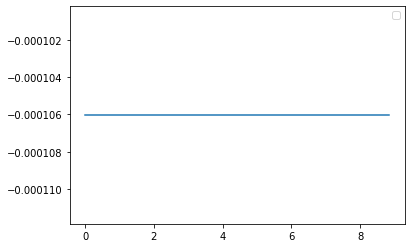

In [32]:
plt.plot(new_X_T[0], fitT.transitmodel)

#plt.plot(new_X_T[0], new_X[0] , label="Original")
plt.legend()
plt.show()

In [ ]:
import ktransit
from ktransit import FitTransit

X_fit_MA = []

for i in range(N):
    if i%100 == 0:
        print("va en el ",i)
    fitT = FitTransit()
    fitT.add_guess_star(ld1=df_meta["Limb Darkening Coeff1"].iloc[i],
                        ld2=df_meta["Limb Darkening Coeff2"].iloc[i])
                        #rho=df_meta["Fitted Stellar Density"].iloc[i])
    fitT.add_guess_planet(
             T0=X_fold_time_tr[i, -1]/2, period=X_fold_time_tr[i, -1], 
            impact=df_meta["Impact Parameter"].iloc[i], rprs=df_meta["r/R"].iloc[i] )


    fitT.add_data(time= new_X_T[i], flux=new_X[i]) 
    fitT.free_parameters()# default all fitparplanet=vary_planet)
    fitT.do_fit()# run the fitting

    X_fit_MA.append(fitT.transitmodel)
X_fit_MA = np.asarray(X_fit_MA)
X_fit_MA.shape

In [26]:
import ktransit
from ktransit import FitTransit

X_fit_MA = []

for i in range(N):
    if i%100 == 0:
        print("va en el ",i)
    fitT = FitTransit()
    fitT.add_guess_star(ld1=df_meta["Limb Darkening Coeff1"].iloc[i],
                        ld2=df_meta["Limb Darkening Coeff2"].iloc[i])
    fitT.add_guess_planet(T0=X_fold_time_tr[i, -1]/2, period=X_fold_time_tr[i, -1],
                         impact=0., rprs= np.abs(new_X[i].min())) 
    
    fitT.add_data(time= new_X_T[i], flux=new_X[i]) 
    #fitT.free_parameters(fitparplanet=['impact','rprs'])# default all fitparplanet=vary_planet)
    fitT.free_parameters()# default all fit
    fitT.do_fit()# run the fitting
    
    if pd.isna(np.sum(fitT.transitmodel)):
        X_fit_MA.append(np.tile(0, len(fitT.transitmodel) ))
    else:
        X_fit_MA.append(fitT.transitmodel)
X_fit_MA = np.asarray(X_fit_MA)
X_fit_MA.shape

va en el  0
va en el  100
va en el  200
va en el  300
va en el  400
va en el  500
va en el  600
va en el  700
va en el  800
va en el  900
va en el  1000
va en el  1100
va en el  1200
va en el  1300
va en el  1400
va en el  1500
va en el  1600
va en el  1700
va en el  1800
va en el  1900
va en el  2000
va en el  2100
va en el  2200
va en el  2300
va en el  2400
va en el  2500
va en el  2600
va en el  2700
va en el  2800
va en el  2900
va en el  3000
va en el  3100
va en el  3200
va en el  3300
va en el  3400
va en el  3500
va en el  3600
va en el  3700
va en el  3800
va en el  3900
va en el  4000
va en el  4100
va en el  4200
va en el  4300


(4317, 300)

import ktransit
from ktransit import FitTransit

impact_prior=df_meta["Impact Parameter"].mean()
print("Impact prior = ",impact_prior)

X_fit_MA = []

for i in range(N):
    if i%100 == 0:
        print("va en el ",i)
    fitT = FitTransit()
    fitT.add_guess_star(ld1=df_meta["Limb Darkening Coeff1"].iloc[i],
                        ld2=df_meta["Limb Darkening Coeff2"].iloc[i])
    fitT.add_guess_planet(T0=X_fold_time_tr[i, -1]/2, period=X_fold_time_tr[i, -1],
                         impact=impact_prior, rprs= np.abs(new_X[i].min())) 
    
    fitT.add_data(time= new_X_T[i], flux=new_X[i]) 
    fitT.free_parameters(fitparplanet=['impact','rprs'])# default all fitparplanet=vary_planet)
    fitT.do_fit()# run the fitting

    if pd.isna(np.sum(fitT.transitmodel)):
        X_fit_MA.append(np.tile(0, len(fitT.transitmodel) ))
    else:
        X_fit_MA.append(fitT.transitmodel)
X_fit_MA = np.asarray(X_fit_MA)
X_fit_MA.shape

### PyLightCurve
https://github.com/ucl-exoplanets/pylightcurve

In [5]:
params = ["N0", "L0", "Q0", "ldc1", "ldc2", "rp_over_rs", "period", "sma_over_rs", "ecc", "inclination","perias","T0"]

LC_data = [ [new_X_T[0], new_X[0]+1, np.tile(1e-7, len(new_X[0]))] ]
#LC_data = [ [a, b, np.tile(1e-7, len(new_X[0]))] for a,b in zip(new_X_T, new_X)  ]

In [6]:
import pylightcurve as plc

method = plc.TransitAndPolyFitting(LC_data, 'quad', 
                                   limb_darkening_coefficients=[0.497, 0.201], 
                                   rp_over_rs=0.114, 
                                   period=X_fold_time_tr[0, -1], mid_time = X_fold_time_tr[0, -1]/2,
                                   sma_over_rs= 36.466, #a/R
                                   inclination= 90, #esta
                                   eccentricity=0, periastron=90,
                                   iterations=500, walkers=50, burn=100, 
                                   fit_period=False, fit_mid_time=False, #fixed period to folded light curve
                                   fit_rp_over_rs = [0, 1],
                                   fit_sma_over_rs = [1,1000],
                                   fit_inclination = [50,90],
                                   fit_eccentricity=False, fit_periastron=False, 
                                   counter=True)
method.run_mcmc()

results = method.results
for a,b in zip(params, results["parameters_final"]):
    print(a, "=",b)

MCMC...........: 500 / 550    time left: 0:00:00   total time: 0:00:00


In [148]:
import pylightcurve as plc

method = plc.TransitAndPolyFitting(LC_data, 'quad', 
                                   limb_darkening_coefficients=[0.497, 0.201], 
                                   rp_over_rs=np.abs(new_X[0].min()), 
                                   period=X_fold_time_tr[0, -1], mid_time = X_fold_time_tr[0, -1]/2,
                                   sma_over_rs= 1,
                                   inclination= 90, 
                                   eccentricity=0, periastron=90,
                                   iterations=15000, walkers=50, burn=5000, 
                                   fit_period=False,  fit_mid_time=False, #fixed period to folded light curve
                                   fit_rp_over_rs = [0., 1],
                                   fit_sma_over_rs = [1,1000],
                                   fit_inclination = [70,90],
                                   fit_eccentricity=False, fit_periastron=False, 
                                   counter=True)
method.run_mcmc()

results = method.results
for a,b in zip(params, results["parameters_final"]):
    print(a, "=",b)

MCMC...........: 15000 / 15050    time left: 0:00:00   total time: 0:00:09
ERROR : confidence level can not be reached from right
N0 = 0.9999950298596327
L0 = 0.0
Q0 = 0.0
ldc1 = 0.497
ldc2 = 0.201
rp_over_rs = 0.11195568760638008
period = 8.855306585016676
sma_over_rs = 30.95313598333122
ecc = 0.0
inclination = 89.96623475615506
perias = 90.0
T0 = 4.427653292508338


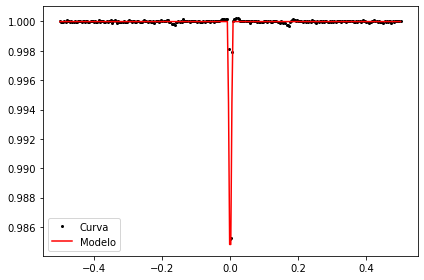

In [149]:
plt.plot(results['output_series']['phase'],
                     results['input_series']['value'], 'ko', ms=2, label="Curva")
plt.plot(results['output_series']['phase'],
             results['output_series']['model'], 'r-' ,  label="Modelo")
plt.legend()
plt.show()

In [ ]:
import pylightcurve as plc

X_fit_MA = []

for i in range(N):
    if i%100 == 0:
        print("va en el ",i)
        
    LC_data = [ [new_X_T[i], new_X[i]+1, np.tile(1e-7, len(new_X[i]))] ]
    method = plc.TransitAndPolyFitting(LC_data, 'quad', 
                                   limb_darkening_coefficients=[df_meta["Limb Darkening Coeff1"].iloc[i], df_meta["Limb Darkening Coeff2"].iloc[i]], 
                                   period=X_fold_time_tr[i, -1], mid_time = X_fold_time_tr[i, -1]/2,
                                   rp_over_rs=np.abs(new_X[i].min()), 
                                   sma_over_rs= 1,
                                   inclination= 90, 
                                   eccentricity=0, periastron=90,
                                   iterations=15000, walkers=50, burn=5000, 
                                   fit_period=False, fit_mid_time=False, #fixed period to folded light curve
                                   fit_rp_over_rs = [0., 1],
                                   fit_sma_over_rs = [1,1000],
                                   fit_inclination = [60,90],
                                   fit_eccentricity=False, fit_periastron=False, 
                                   counter=False)
    method.run_mcmc()    
    
    X_fit_MA.append(method.results['output_series']['model'])
X_fit_MA = 1.- np.asarray(X_fit_MA)
X_fit_MA.shape

In [ ]:
X_fit_MA = []

for i in range(N):
    if i%100 == 0:
        print("va en el ",i)
        
    LC_data = [ [new_X_T[i], new_X[i]+1, np.tile(1e-7, len(new_X[i]))] ]
    method = plc.TransitAndPolyFitting(LC_data, 'quad', 
                                   limb_darkening_coefficients=[df_meta["Limb Darkening Coeff1"].iloc[i], df_meta["Limb Darkening Coeff2"].iloc[i]], 
                                   period=X_fold_time_tr[i, -1],
                                   mid_time = X_fold_time_tr[i, -1]/2,
                                   rp_over_rs=np.abs(new_X[i].min()), 
                                   sma_over_rs= 1,
                                   inclination= 90, 
                                   eccentricity=0, periastron=90,
                                   iterations=50000, walkers=50, burn=10000, 
                                   fit_period=False, fit_mid_time=False, #fixed period to folded light curve
                                   fit_rp_over_rs = [0., 1],
                                   fit_sma_over_rs = [1,1000],
                                   fit_inclination = [60,90],
                                   fit_eccentricity=False, fit_periastron=False, 
                                   counter=False)
    method.run_mcmc()    
    
    X_fit_MA.append(method.results['output_series']['model'])
X_fit_MA = 1.- np.asarray(X_fit_MA)
X_fit_MA.shape

In [ ]:
##inicializar con means de data..

### Dynamic Nested Sampling 
https://github.com/pearsonkyle/Exoplanet-Light-Curve-Analysis

In [15]:
from ELCA.ELCA import lc_fitter

prior = { 
        'rprs':0.02,        # Rp/Rs
        'ars':14.07,        # a/Rs
        'per':3.336817,     # Period [day]
        'inc':88.75,        # Inclination [deg]
        'u1': 0.3, 'u2': 0.01, # limb darkening (linear, quadratic)
        'ecc':0,            # Eccentricity
        'omega':0,          # Arg of periastron
        'tmid':0.75         # time of mid transit [day]
} 

# create bounds only for the free parameters
mybounds = {
    'rprs':[0,0.1],
    'tmid':[min(t),max(t)],
    'ars':[13,15]
}

# fit the light curve
myfit = lc_fitter(new_X_T[0], new_X[0], 1e-7, prior, mybounds)

# print final parameters
for k in myfit.bounds.keys():
    print(myfit.finalpars[k], '+-', myfit.errors[k])

11001it [06:28,  2.72it/s, batch: 0 | bound: 124 | nc: 86 | ncall: 115242 | eff(%):  9.505 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-    nan | dlogz:    inf >  0.010] Traceback (most recent call last):
  File "/home/casapanshop/anaconda2/envs/newpy3_tf1/lib/python3.6/site-packages/dynesty/dynesty.py", line 939, in __call__
    return self.func(x, *self.args, **self.kwargs)
  File "/home/fmena/Desktop/PIIC19/code/obj4/ELCA/ELCA.py", line 352, in loglike
    model = transit(self.time, self.prior)
  File "/home/fmena/Desktop/PIIC19/code/obj4/ELCA/ELCA.py", line 328, in transit
    sep,phase = time2z(time, values['inc'], values['tmid'], values['ars'], values['per'], values['ecc'])
  File "/home/fmena/Desktop/PIIC19/code/obj4/ELCA/ELCA.py", line 304, in time2z
    f.append(2e0*np.angle(cn))
  File "<__array_function__ internals>", line 6, in angle
  File "/home/casapanshop/anaconda2/envs/newpy3_tf1/lib/python3.6/site-packages/numpy/lib/function_base.py", line 1454, in angle
   

Exception while calling loglikelihood function:
  params: [ 0.09999913  0.97731275 13.00514889]
  args: []
  kwargs: {}
  exception:


KeyboardInterrupt: 

In [ ]:
# light curve plot with residuals
fig,axs = myfit.bestfit_plot()
plt.show()

# triangle plot
fig,axs = dynesty.plotting.cornerplot(myfit.results)
plt.show()

### EVAL 

In [32]:
from autoencoder_utils import Recon_eval
Evaluate = Recon_eval()

def evaluate_reconst(x,xhat):
    print("----- EVALUANDO RECONSTRUCCION DE LA CURVA -----")
    res = Evaluate.get_res(x, xhat)
    plt.figure(figsize=(10,4))
    sns.distplot(res.flatten())
    plt.title("Distribucion de residuos promedio")
    plt.show()
    
    print("------------- Error -------------")
    #print("MSE      = ",Evaluate.MSE_LC(None,None, res))
    print("RMSE (+-) = ",Evaluate.RMSE_LC(None,None, res))
    print("MAE  (+-) = ",Evaluate.MAE_LC(None,None, res))
    
    print("------------- Smoothness -------------")
    xhat = np.squeeze(xhat)
    A = np.mean(np.apply_along_axis(Evaluate.autocorr_func, 1, xhat)[:,1])
    print("AutoCorr lag-one = ",A)
    M = np.mean(np.apply_along_axis(Evaluate.mean_diff, 1, xhat))
    print("Diff MEAN = ",M)
    #S = np.mean(np.apply_along_axis(Evaluate.std_diff, 1, xhat))
    #print("Diff STD = ",S)
    
    print("------------- Residual -------------")
    res = np.squeeze(res)
    R = np.mean(np.apply_along_axis(Evaluate.autocorr_func, 1, res)[:,1])
    print("AutoCorr lag-one = ",R)
    M = np.mean(np.apply_along_axis(np.mean, 1, res))
    S = np.mean(np.apply_along_axis(np.std, 1, res))
    print("Mean (+) STD = %f (+) %f"%(M,S))
    #perm = np.mean(np.apply_along_axis(Evaluate.series_entropy, 1, res, which='perm'))
    #print("Permutation H = ",perm)
    #spec = np.mean(np.apply_along_axis(Evaluate.series_entropy, 1, res, which='spec'))
    #print("Spectral H = ",spec)
    H = np.mean(np.apply_along_axis(Evaluate.prob_entropy, 1, res))
    print("H values = ",H)
    H_norm = np.mean(np.apply_along_axis(Evaluate.prob_entropy, 1, res, normalize=True))
    print("H normalized value = ",H_norm)
    print("---------------------------------------")
    
from sklearn.metrics import mean_squared_error
def plot_n_lc(real_lc, decoded_lc, n = 10, s=None):
    for _ in range(n):
        n_sampled = np.random.randint(0, real_lc.shape[0])
        real_lc_n = np.squeeze(real_lc[n_sampled])
        decoded_lc_n = np.squeeze(decoded_lc[n_sampled])
        
        if s !=None:
            print("Real scale = %f\nPred scale = %f"%(s[0][n_sampled], s[1][n_sampled] ))
        f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize= (15,5))
        ax1.plot(real_lc_n, 'b.-')
        ax1.set_title("Real")
        ax2.plot(decoded_lc_n, 'b.-')
        ax2.set_title("Reconstructed")
        ax3.plot(real_lc_n-decoded_lc_n, 'b.-')
        ax3.set_title("Residuo")
        plt.show()  

        plt.figure(figsize=(15,5))
        plt.plot(real_lc_n, 'bo-', label="Real")
        plt.plot(decoded_lc_n, 'g*-', label="Reconstructed")
        plt.title("Over")
        plt.legend()
        plt.show()
        print("----------------------------------------------------------------")

In [28]:
def scaled_MSE(y_true,y_pred,scale):
    return np.mean(np.mean( scale**2 * np.mean( (y_true - y_pred)**2 , axis=1), axis=0))

S_train = np.std(X_fold_lc_tr, axis=1, keepdims=True)

X_lc_eval = X_fold_lc_tr/S_train

----- EVALUANDO RECONSTRUCCION DE LA CURVA -----


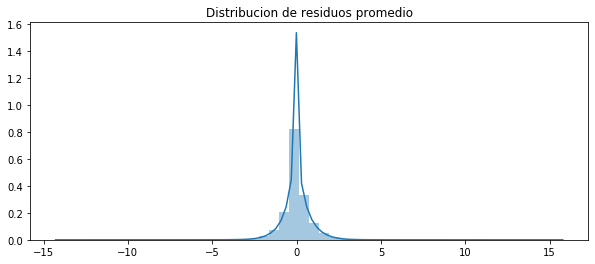

------------- Error -------------
RMSE (+-) =  0.7482588741996848
MAE  (+-) =  0.5025447365046427
------------- Smoothness -------------


/home/fmena/Desktop/PIIC19/code/obj4/autoencoder_utils.py:38: RuntimeWarning: invalid value encountered in true_divide
  return result[len(x)-1:]/np.var(x, ddof=len(x)-1)


AutoCorr lag-one =  nan
Diff MEAN =  0.030386021593095107
------------- Residual -------------
AutoCorr lag-one =  0.07420571732786813
Mean (+) STD = 0.000262 (+) 0.748245
Permutation H =  0.9955809580472499
Spectral H =  0.8819535156180419
H values =  5.657596495445608
H normalized value =  0.9919025700198397
---------------------------------------


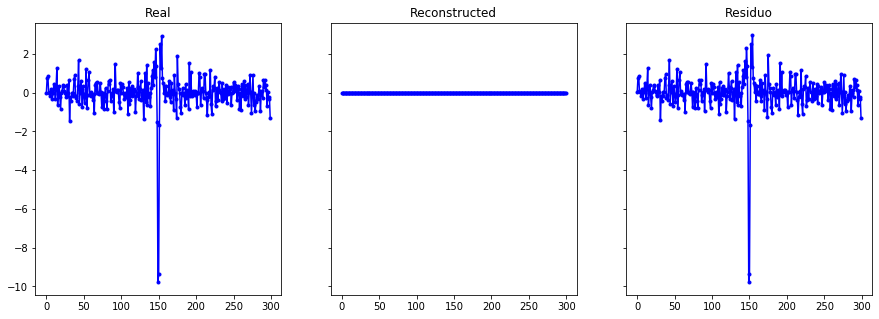

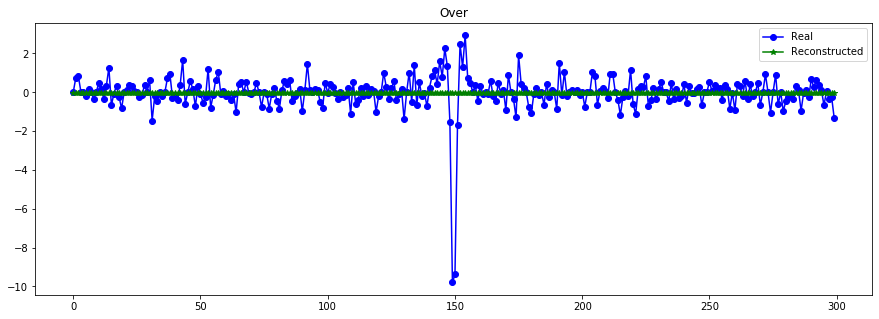

----------------------------------------------------------------


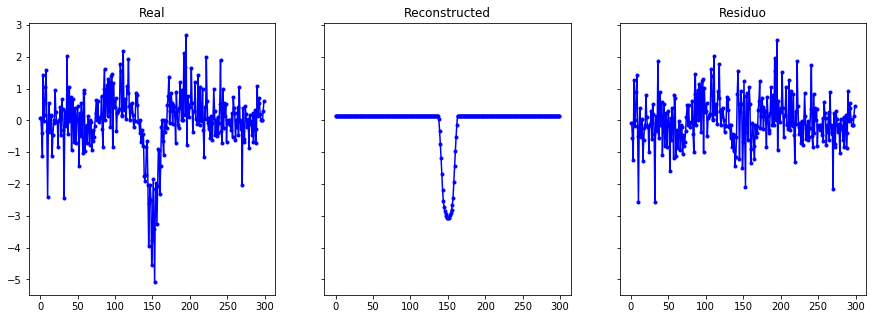

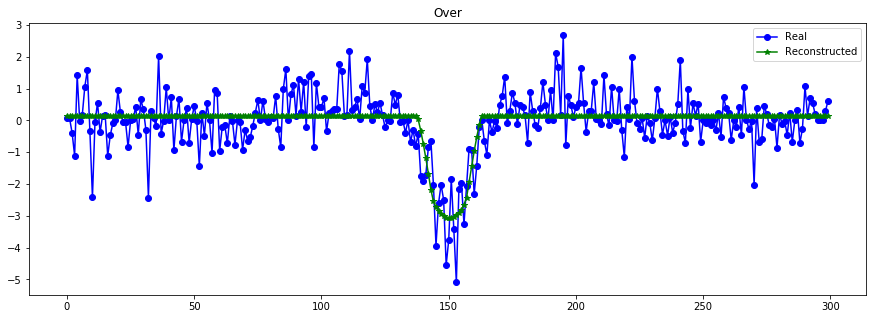

----------------------------------------------------------------


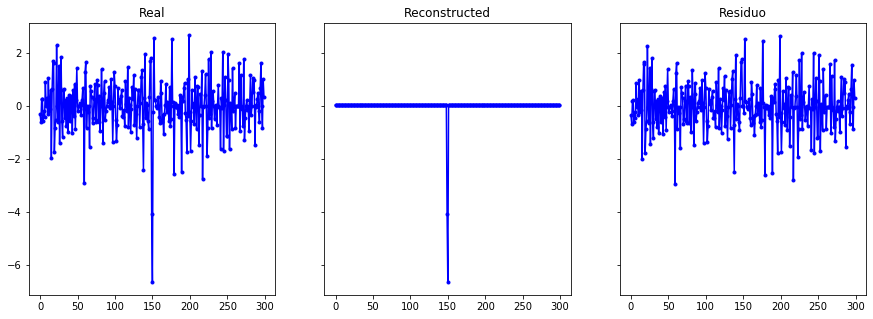

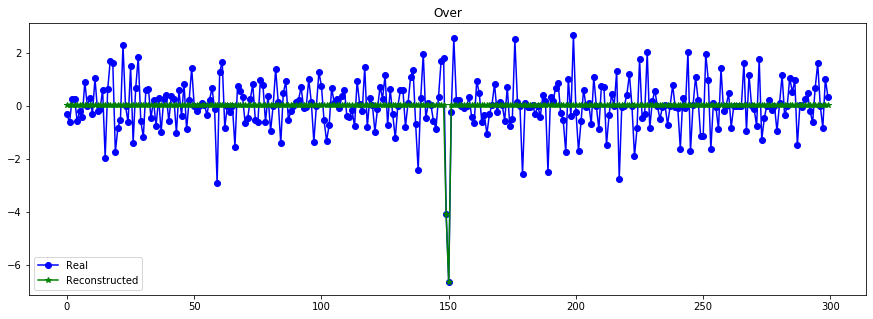

----------------------------------------------------------------


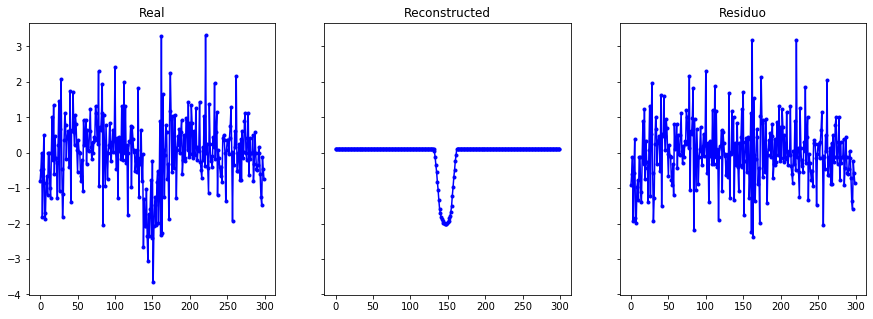

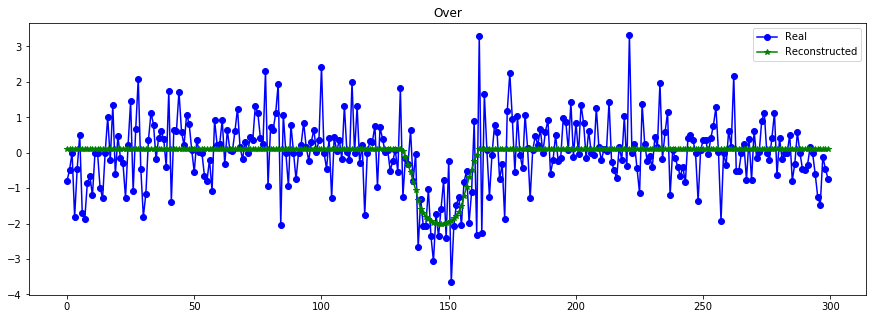

----------------------------------------------------------------


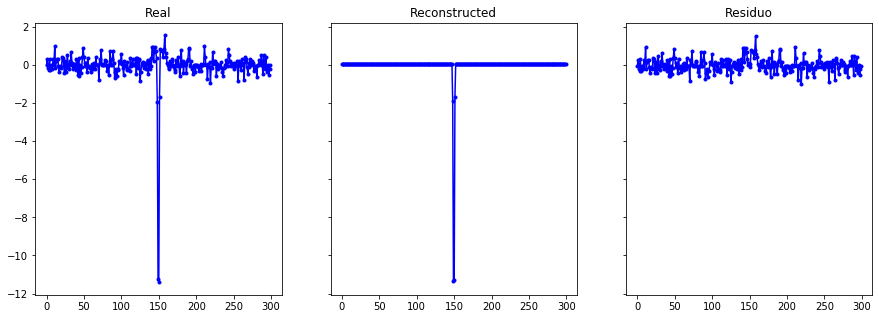

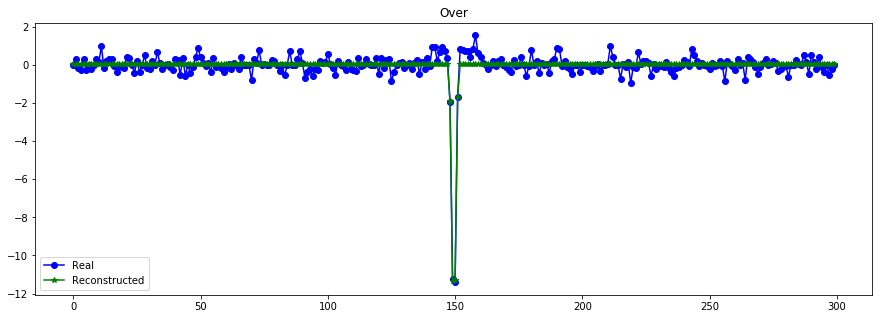

----------------------------------------------------------------


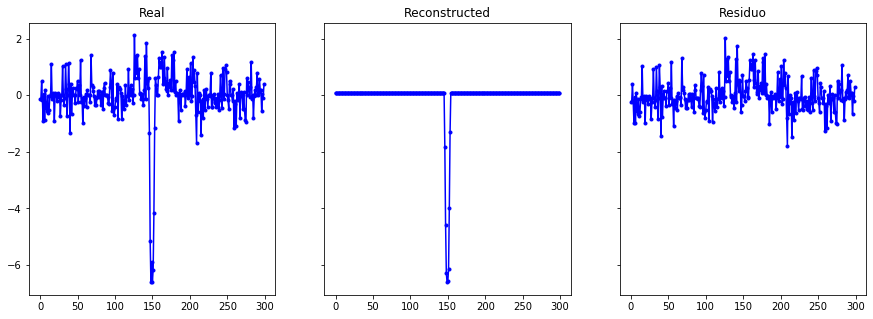

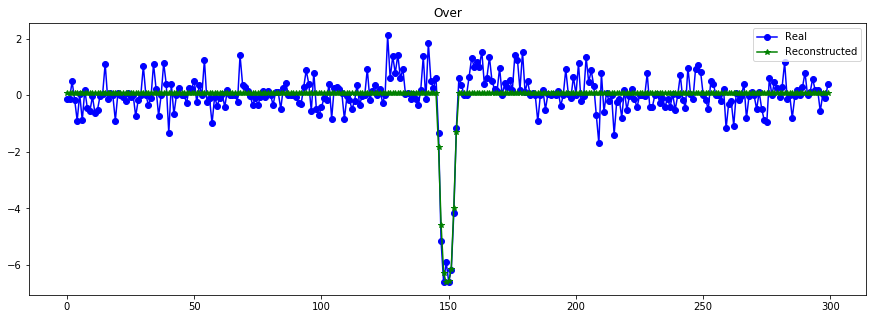

----------------------------------------------------------------


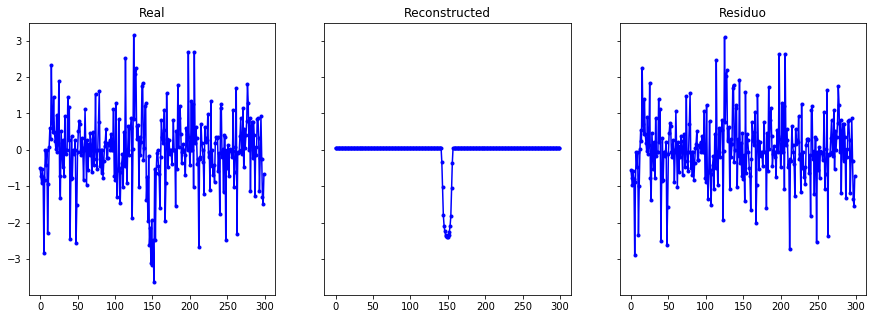

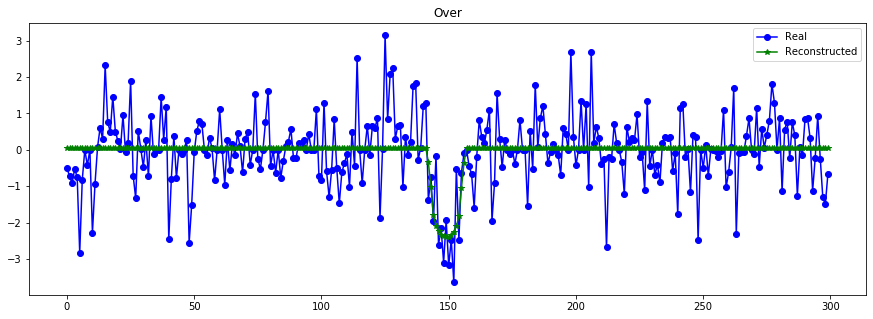

----------------------------------------------------------------


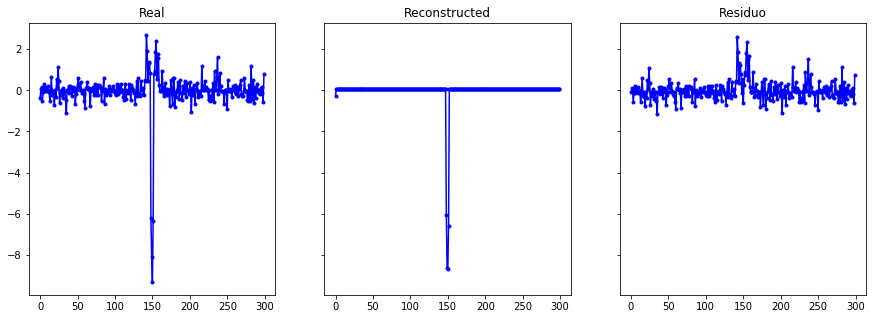

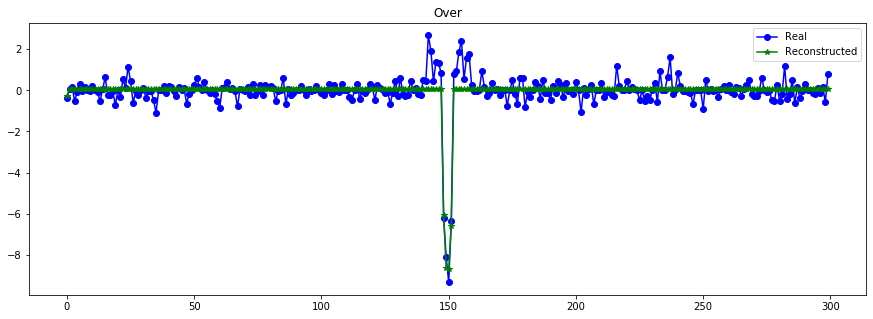

----------------------------------------------------------------


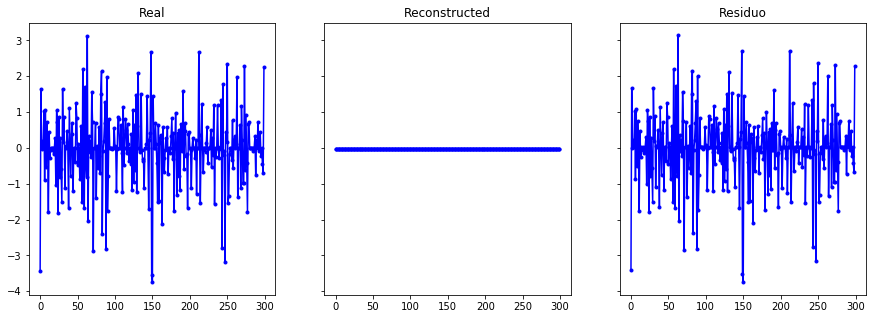

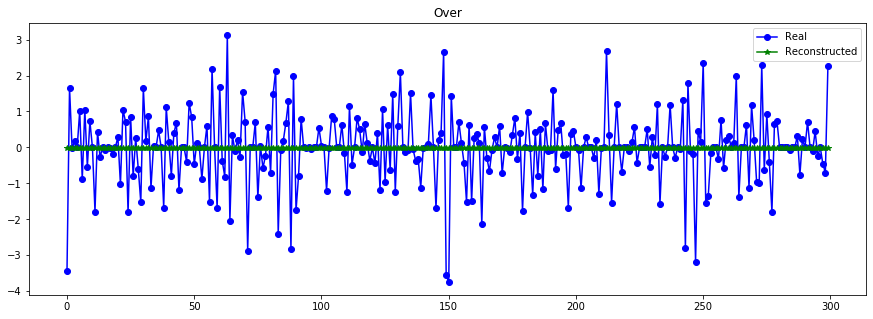

----------------------------------------------------------------


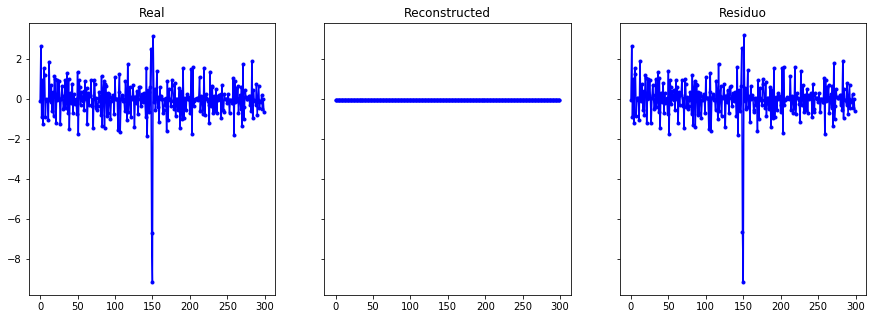

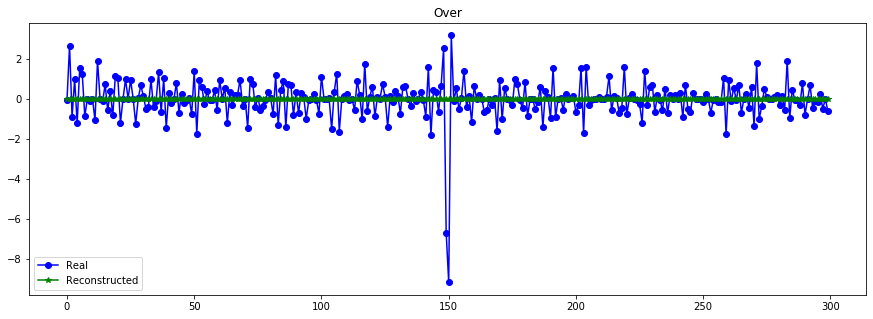

----------------------------------------------------------------


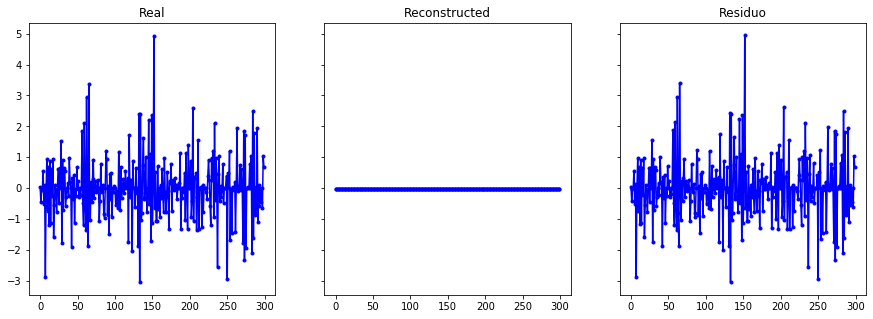

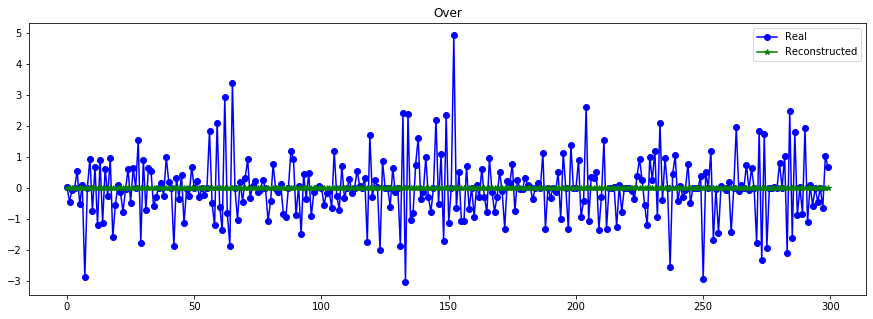

----------------------------------------------------------------


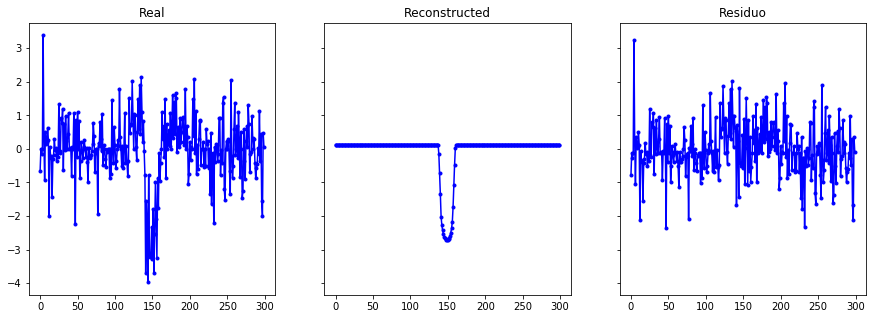

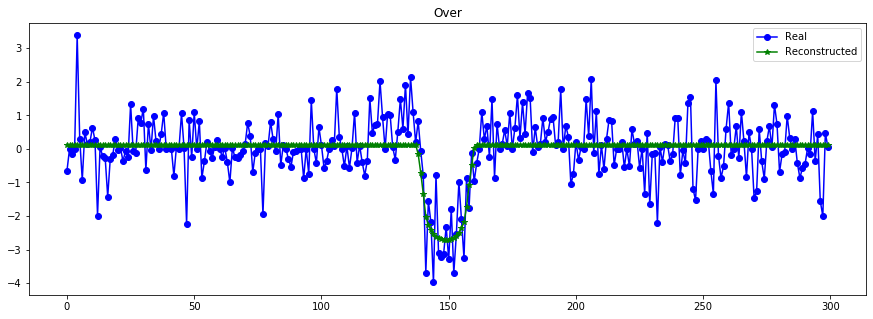

----------------------------------------------------------------


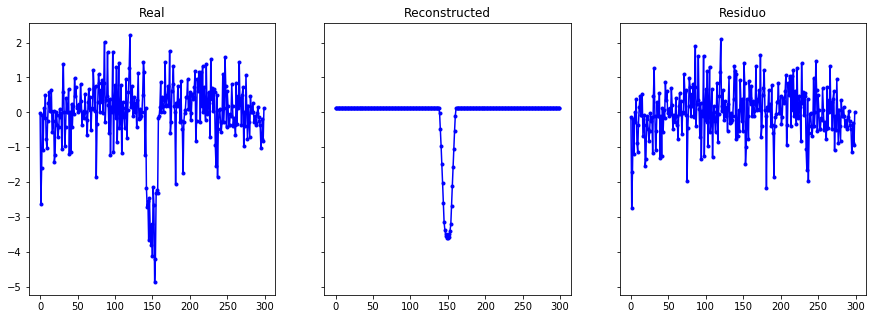

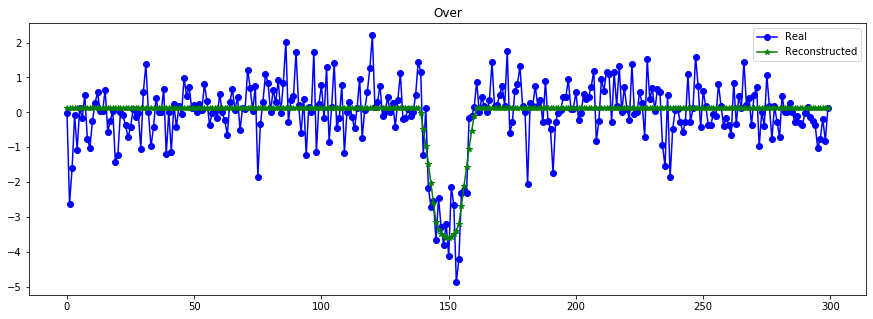

----------------------------------------------------------------


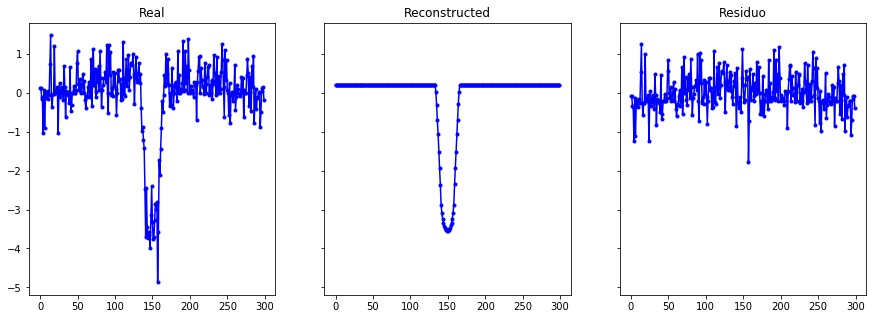

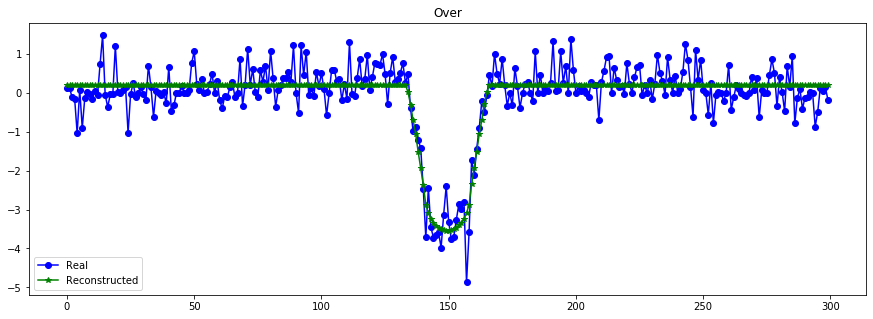

----------------------------------------------------------------


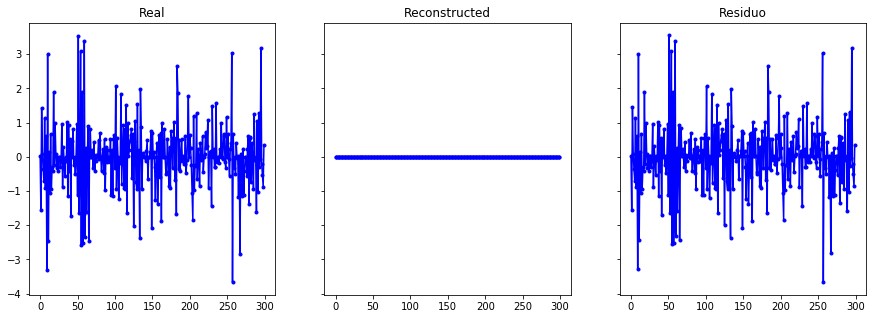

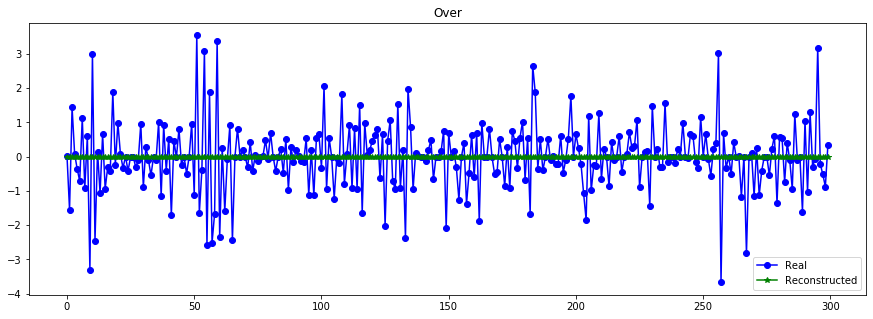

----------------------------------------------------------------


In [12]:
#K transit sin el fitted stellar
X_fit_MA_eval = X_fit_MA/S_train

evaluate_reconst(X_lc_eval, X_fit_MA_eval)

plot_n_lc(X_lc_eval, X_fit_MA_eval, n= 15)

----- EVALUANDO RECONSTRUCCION DE LA CURVA -----


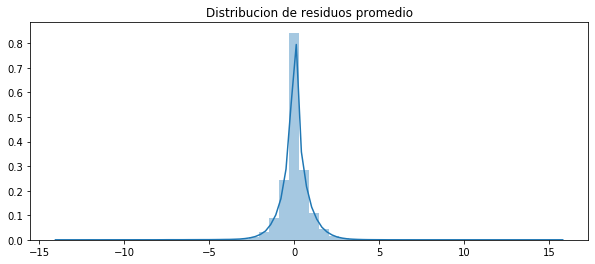

------------- Error -------------
RMSE (+-) =  0.7988298402797084
MAE  (+-) =  0.5144107039403086
------------- Smoothness -------------
AutoCorr lag-one =  0.6925863546168015
Diff MEAN =  0.027811437636603892
------------- Residual -------------
AutoCorr lag-one =  0.11520657170526108
Mean (+) STD = 0.034113 (+) 0.795970
Permutation H =  0.995516025393227
Spectral H =  0.872779218713567
H values =  5.661874492302129
H normalized value =  0.9926525980714934
---------------------------------------


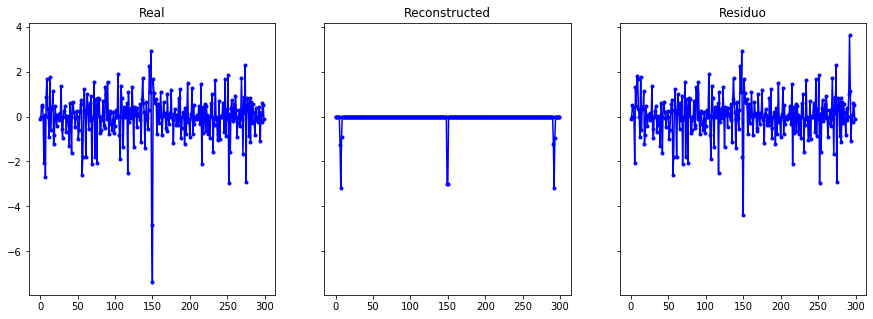

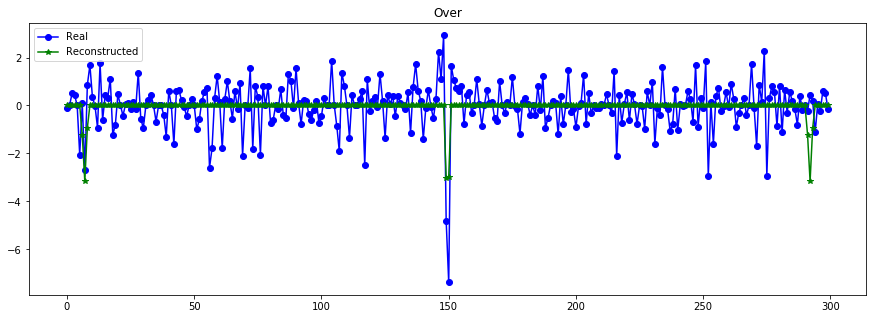

----------------------------------------------------------------


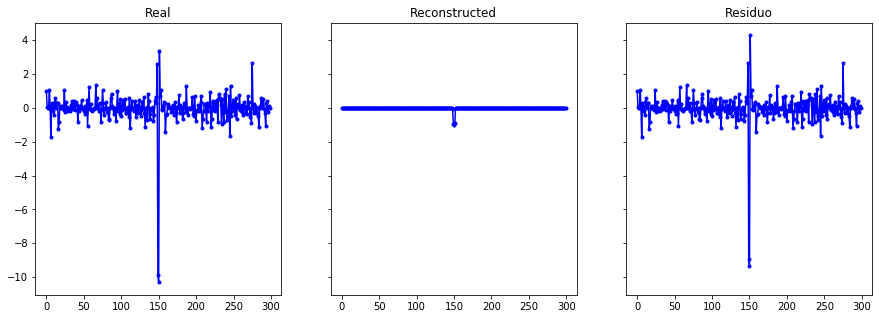

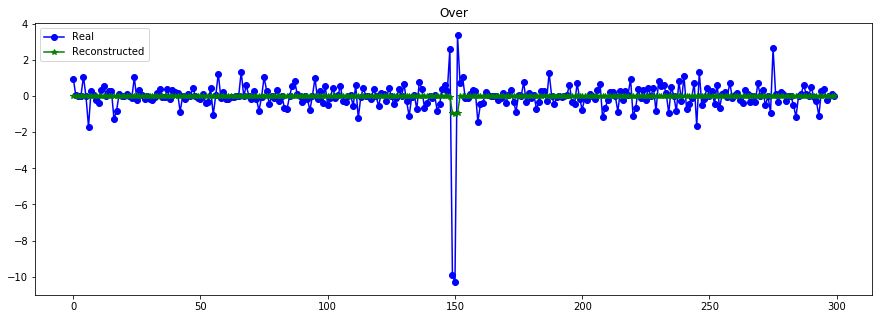

----------------------------------------------------------------


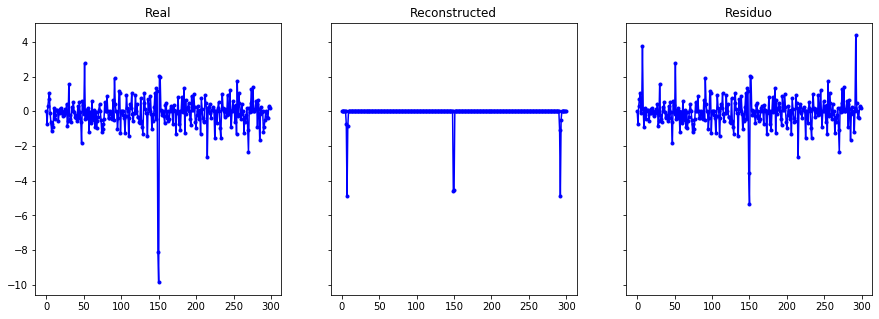

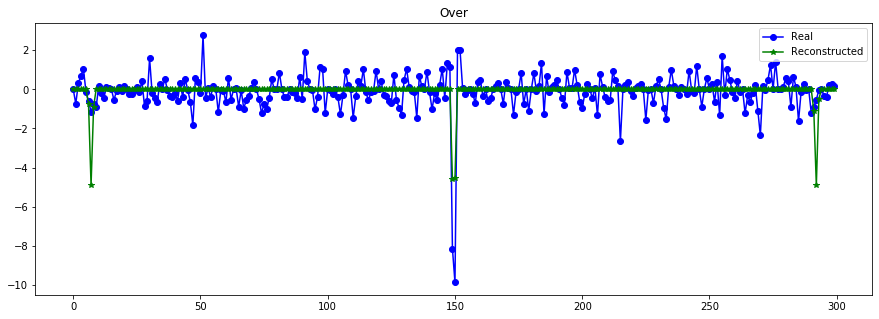

----------------------------------------------------------------


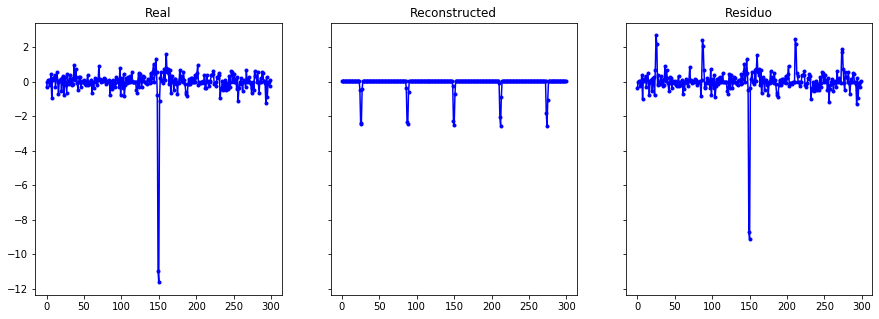

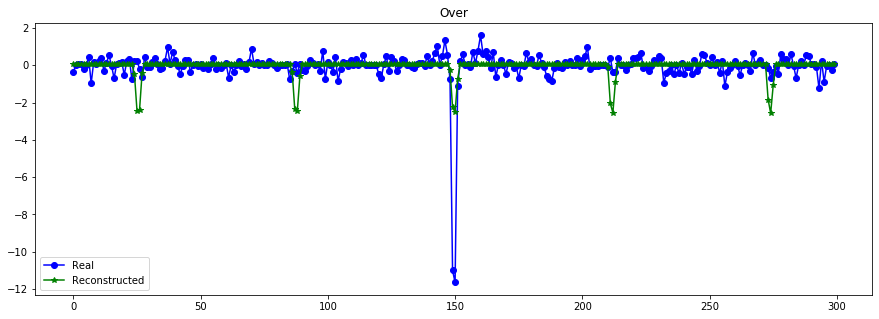

----------------------------------------------------------------


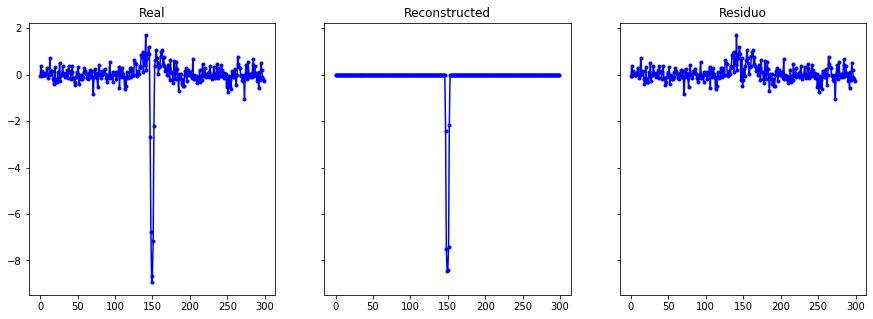

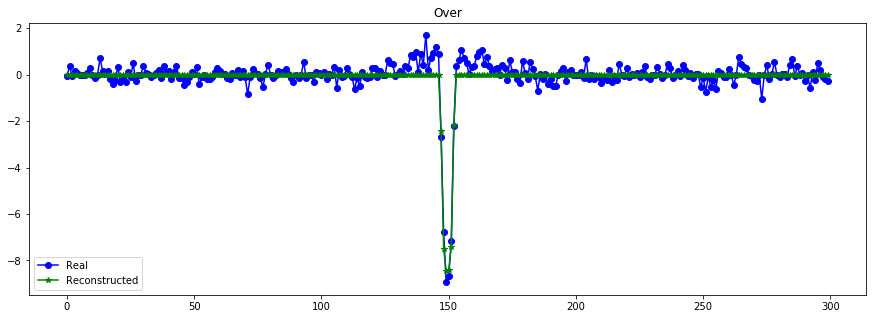

----------------------------------------------------------------


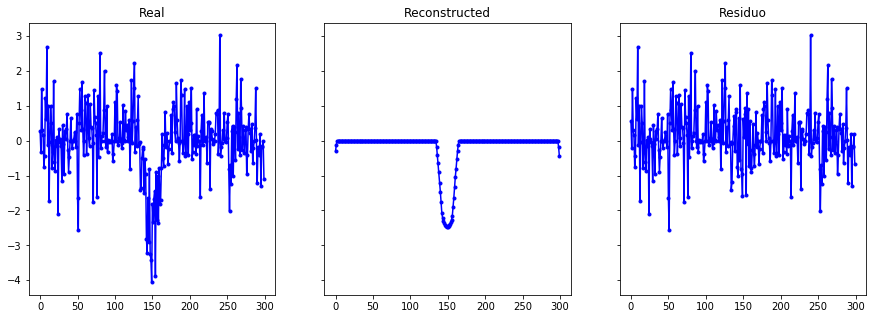

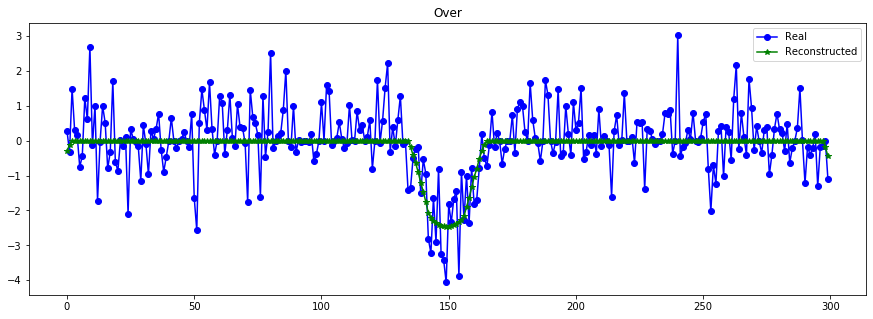

----------------------------------------------------------------


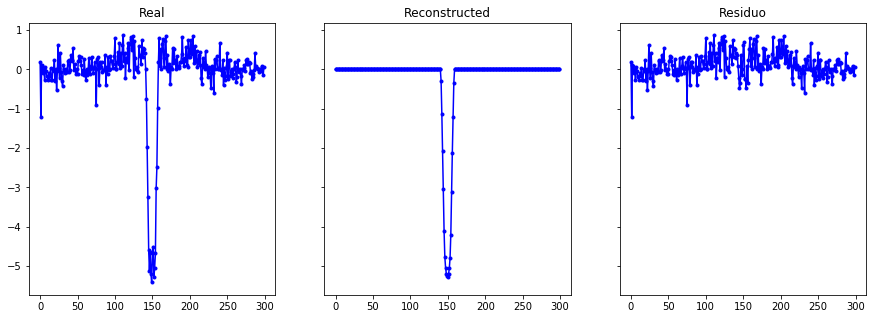

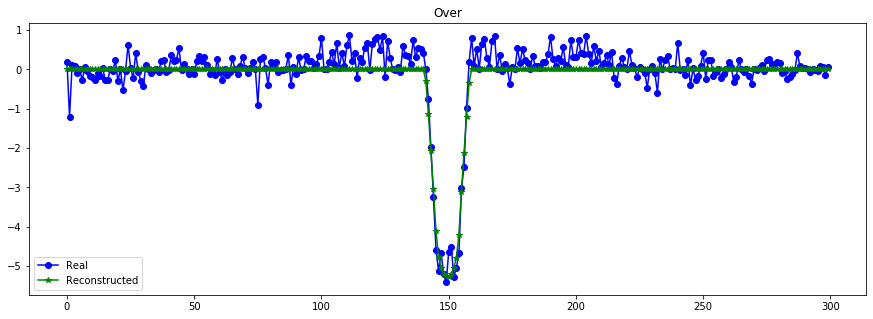

----------------------------------------------------------------


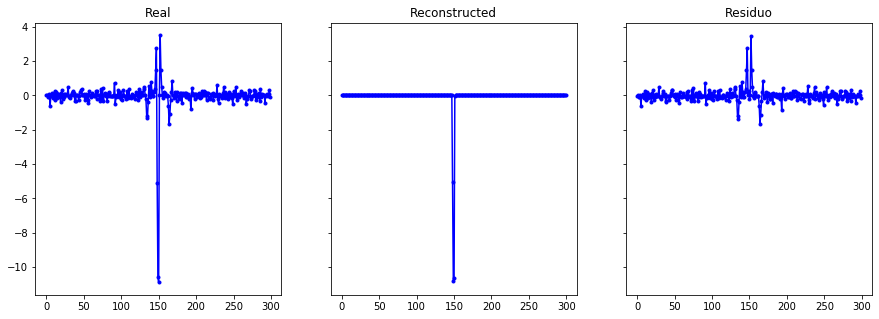

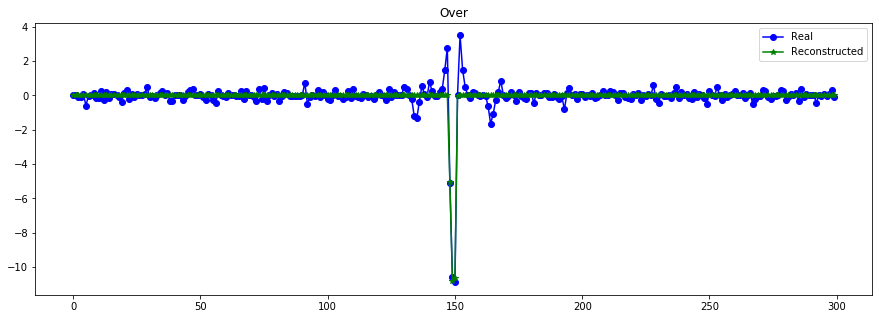

----------------------------------------------------------------


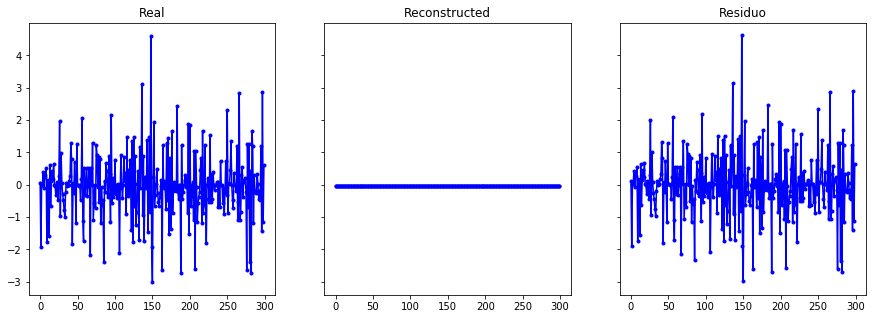

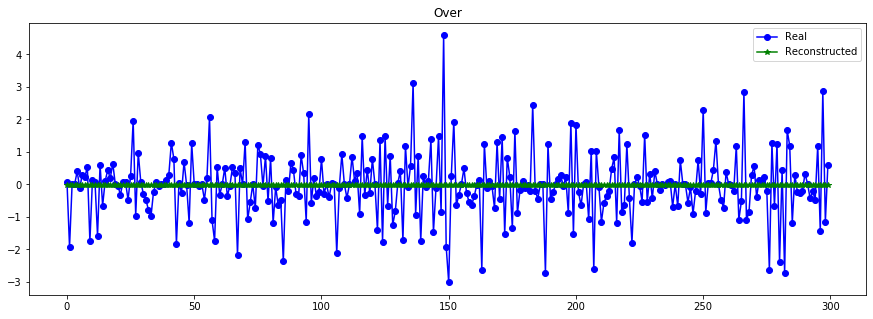

----------------------------------------------------------------


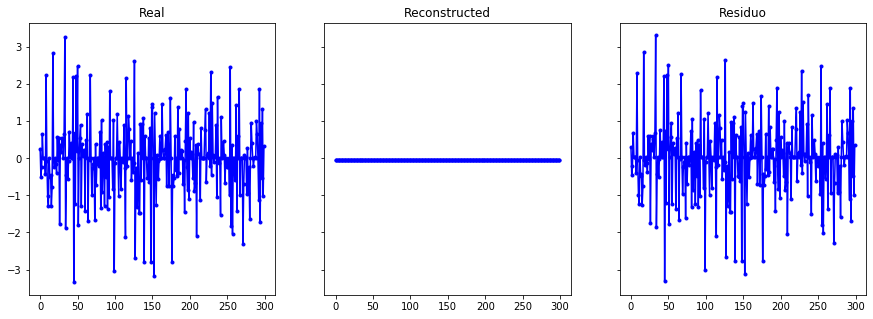

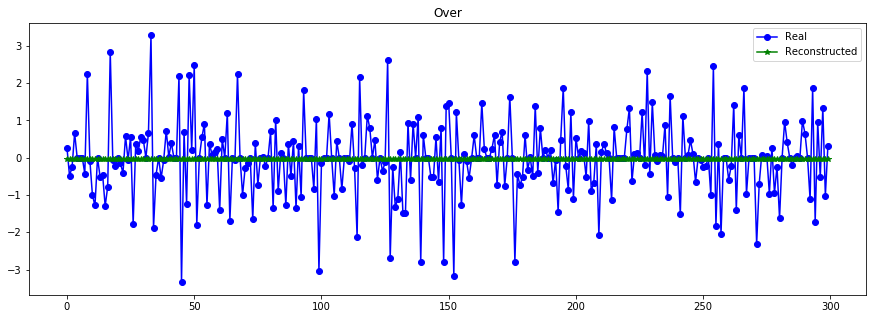

----------------------------------------------------------------


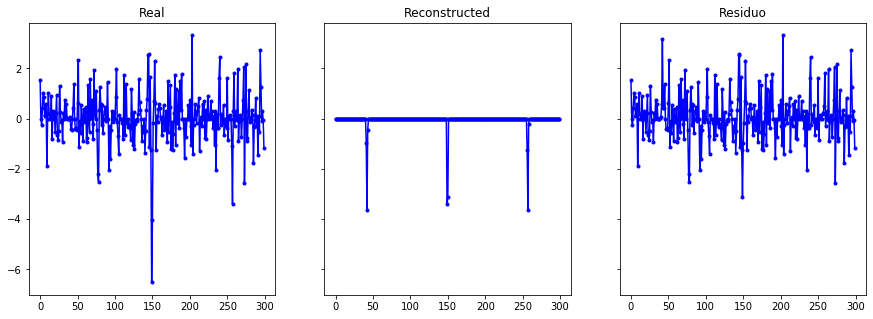

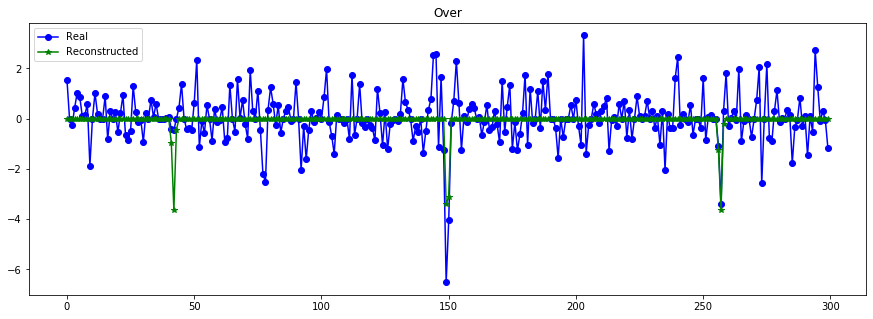

----------------------------------------------------------------


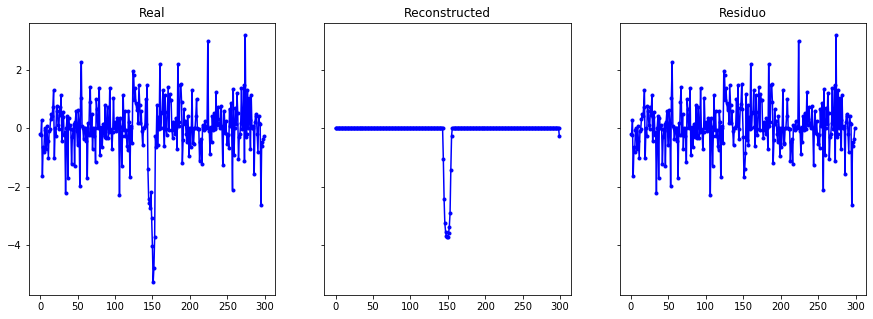

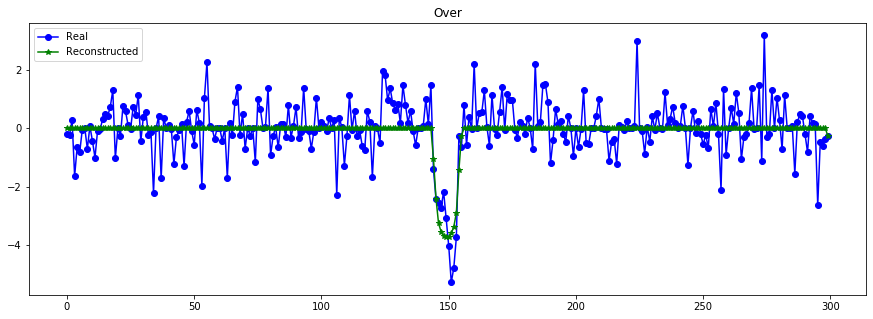

----------------------------------------------------------------


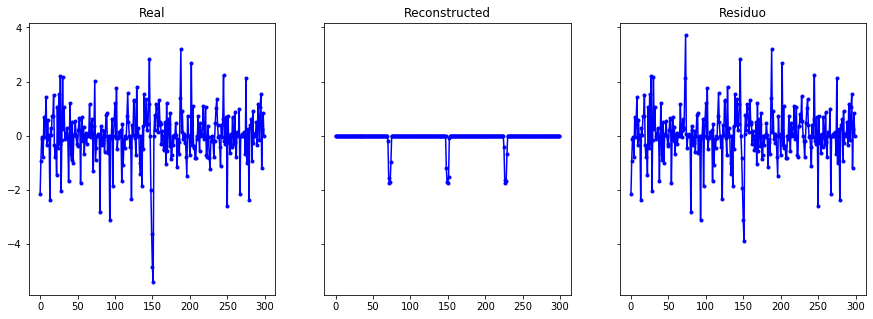

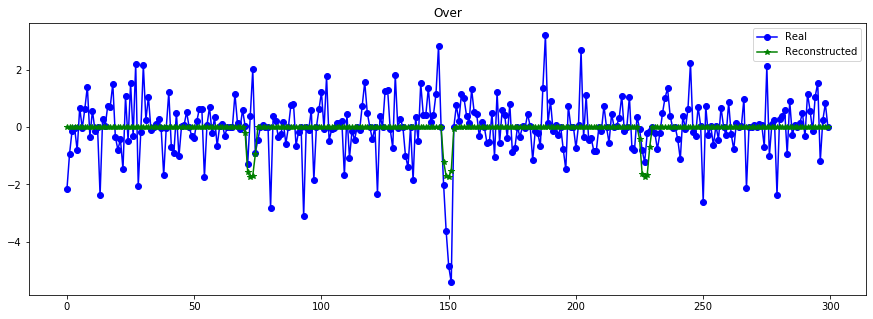

----------------------------------------------------------------


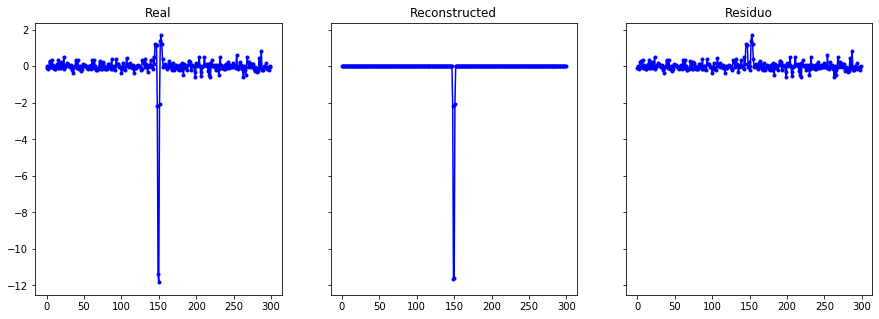

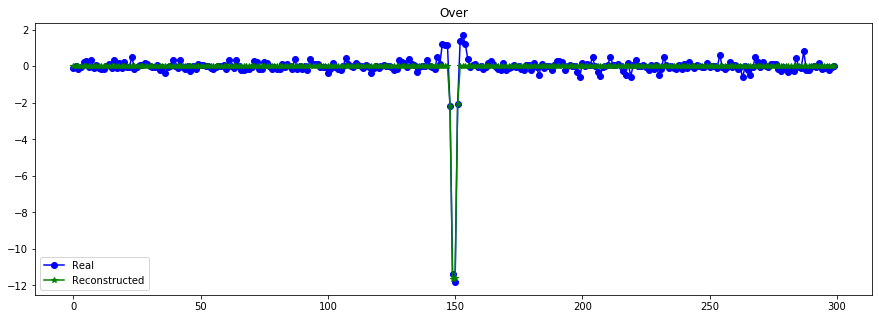

----------------------------------------------------------------


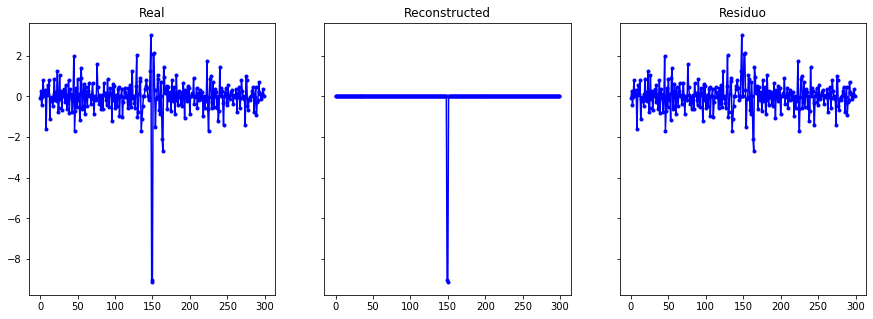

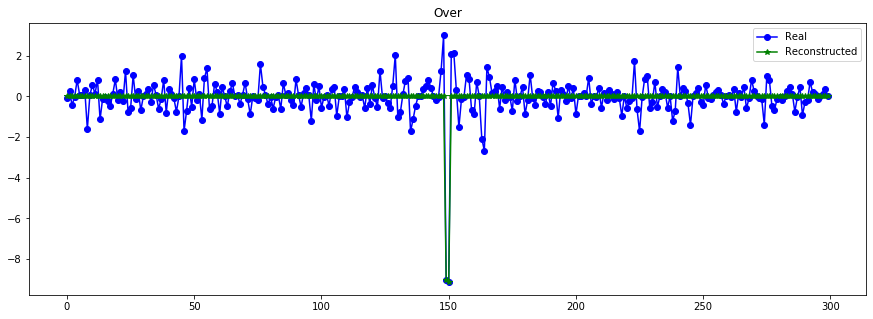

----------------------------------------------------------------


In [59]:
#K transit solo con prioor de limb darkening (cross matchin) y con periodo y t0 (ya que folded deberia saberlo)
#impact = 0
X_fit_MA_eval = X_fit_MA/S_train

evaluate_reconst(X_lc_eval, X_fit_MA_eval)

plot_n_lc(X_lc_eval, X_fit_MA_eval, n= 15) ## ELEGIDO

----- EVALUANDO RECONSTRUCCION DE LA CURVA -----


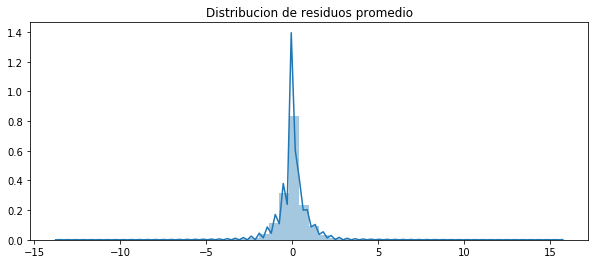

------------- Error -------------
RMSE (+-) =  0.7647539895132655
MAE  (+-) =  0.5040841753651618
------------- Smoothness -------------
AutoCorr lag-one =  0.727936330297882
Diff MEAN =  0.029350048763628435
------------- Residual -------------
AutoCorr lag-one =  0.0822285661503179
Mean (+) STD = 0.035510 (+) 0.761804
H values =  5.656600239118698
H normalized value =  0.9917279041150062
---------------------------------------


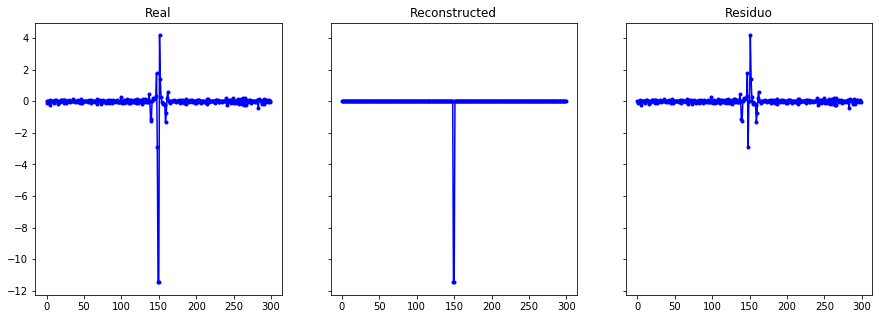

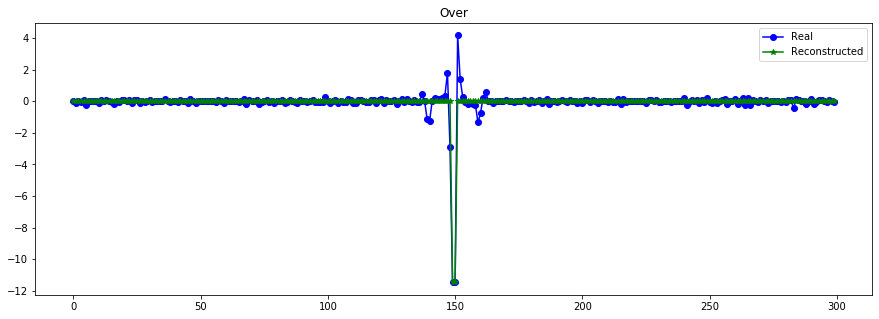

----------------------------------------------------------------


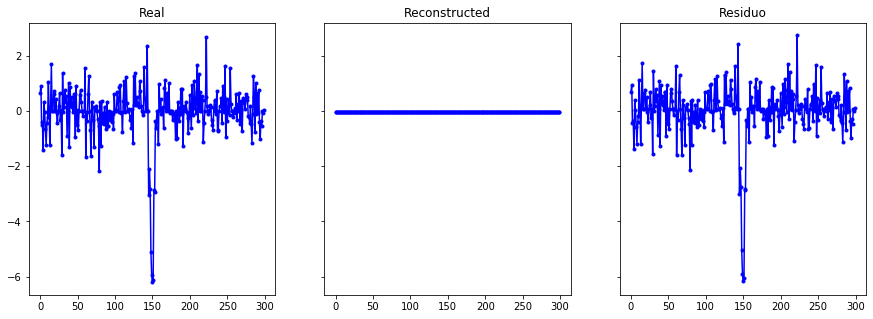

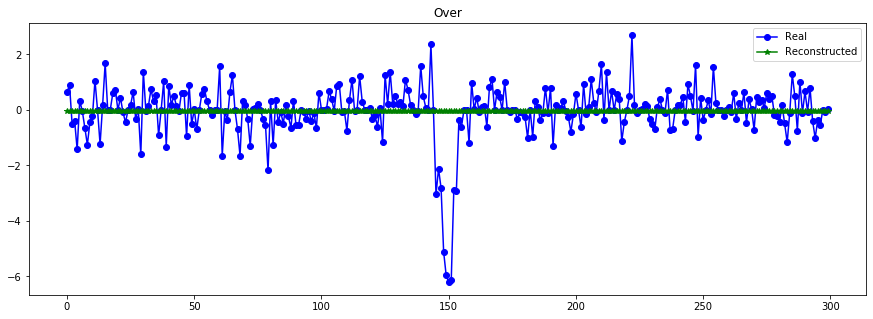

----------------------------------------------------------------


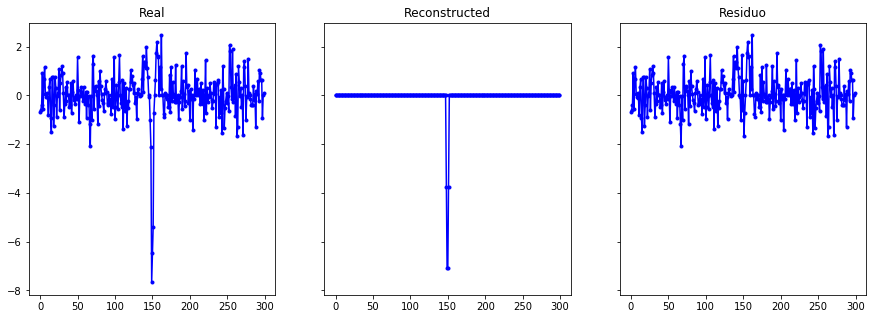

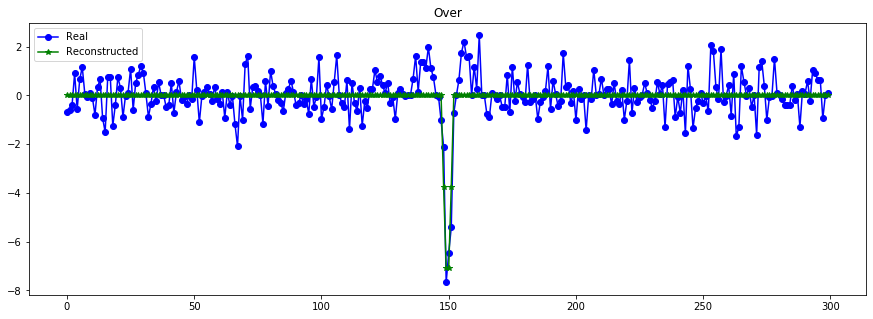

----------------------------------------------------------------


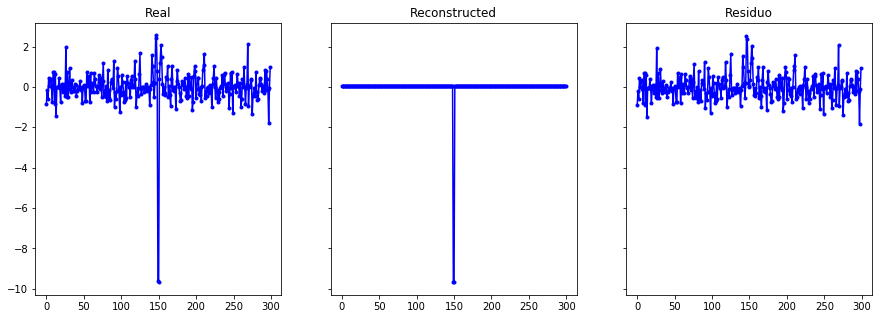

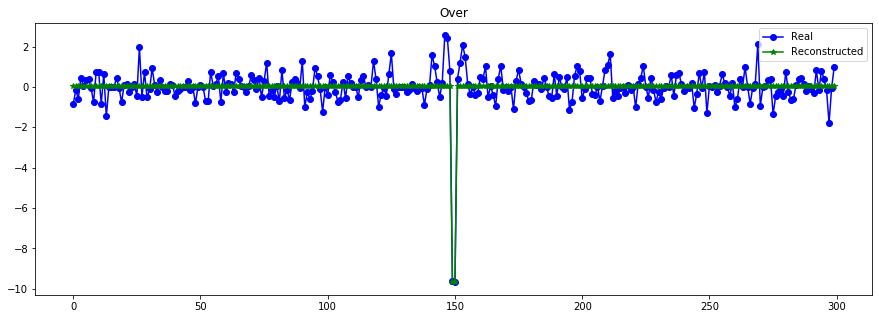

----------------------------------------------------------------


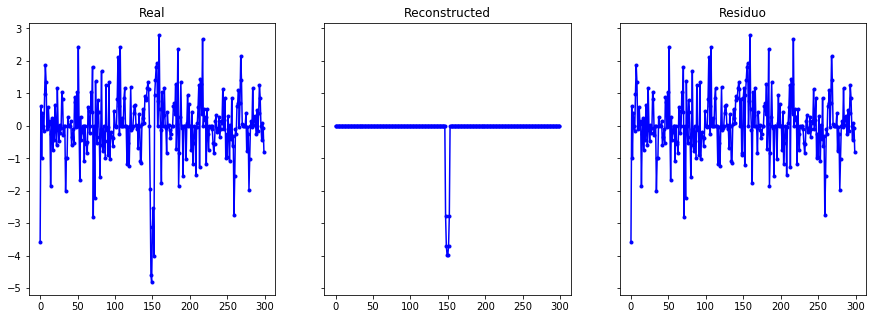

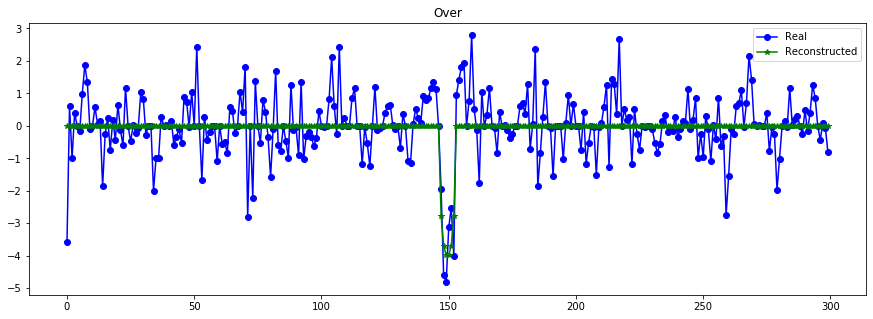

----------------------------------------------------------------


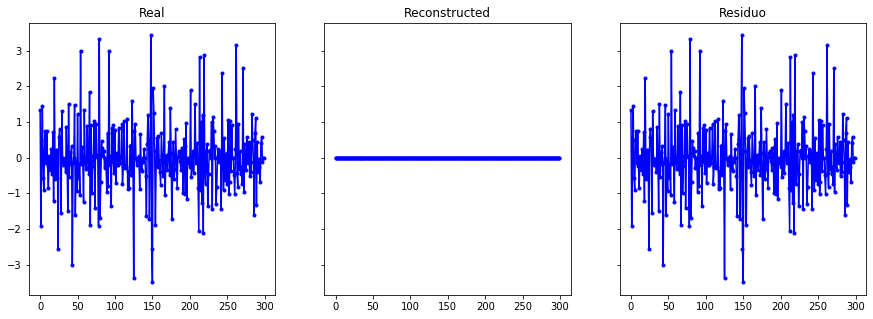

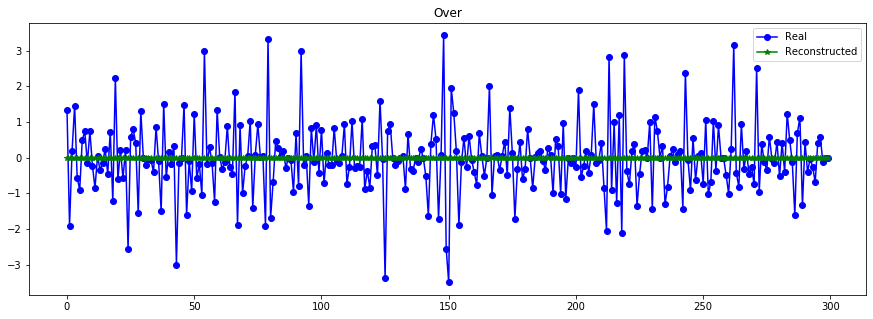

----------------------------------------------------------------


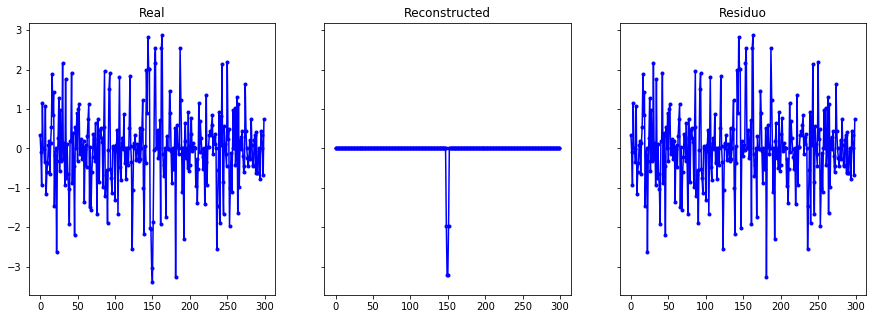

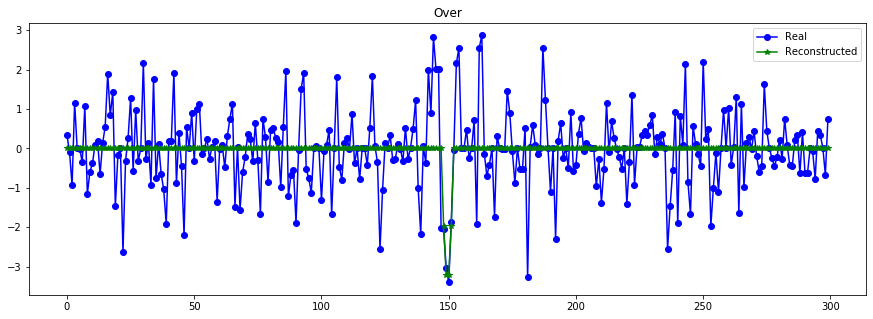

----------------------------------------------------------------


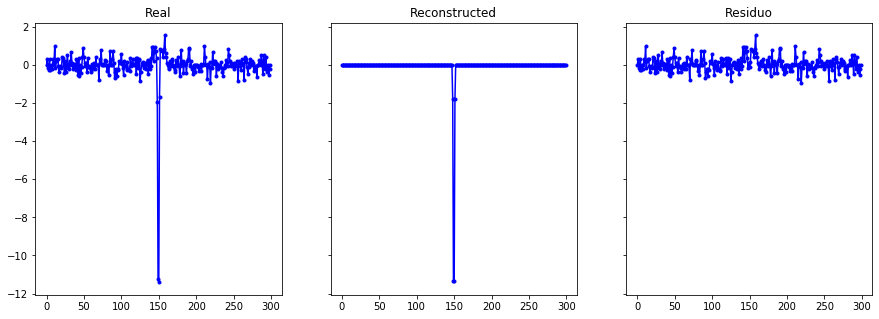

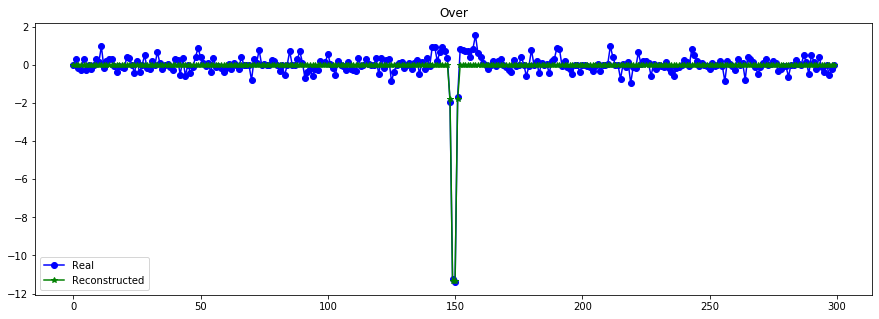

----------------------------------------------------------------


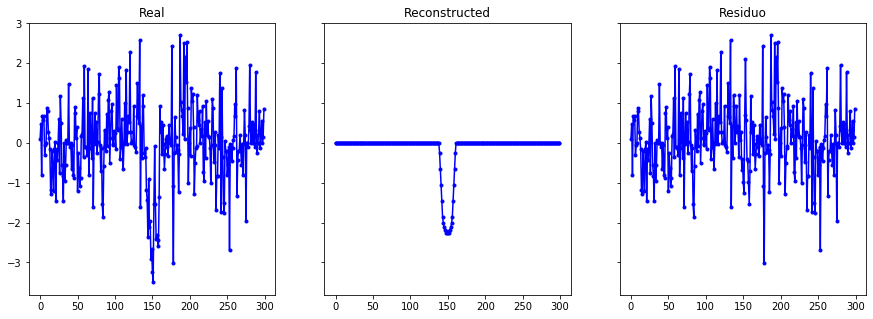

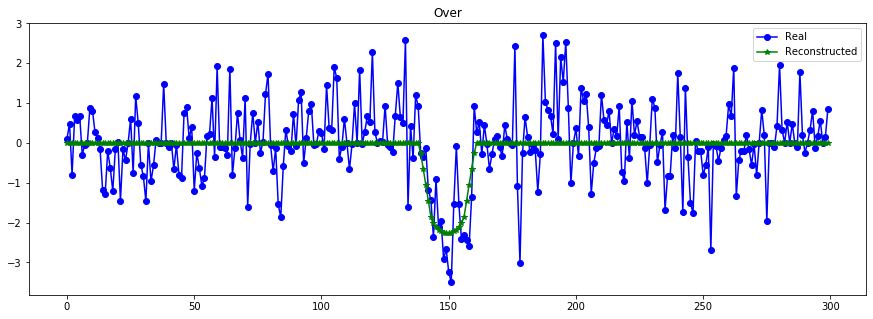

----------------------------------------------------------------


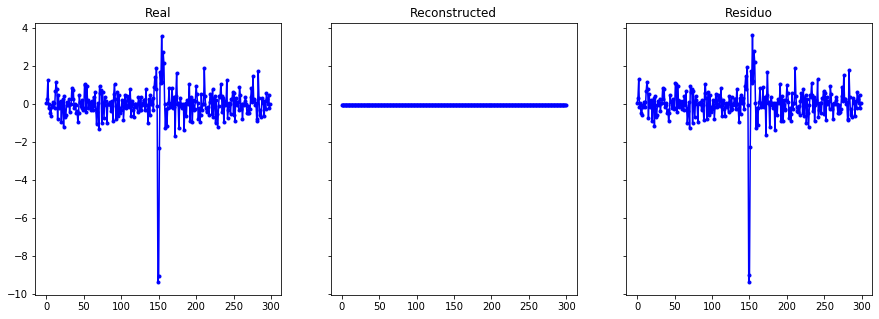

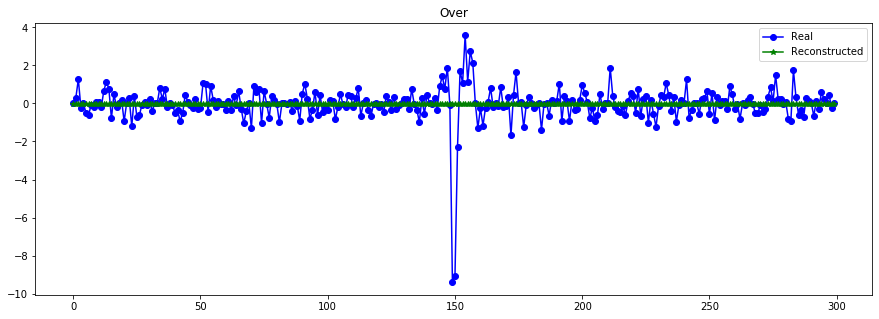

----------------------------------------------------------------


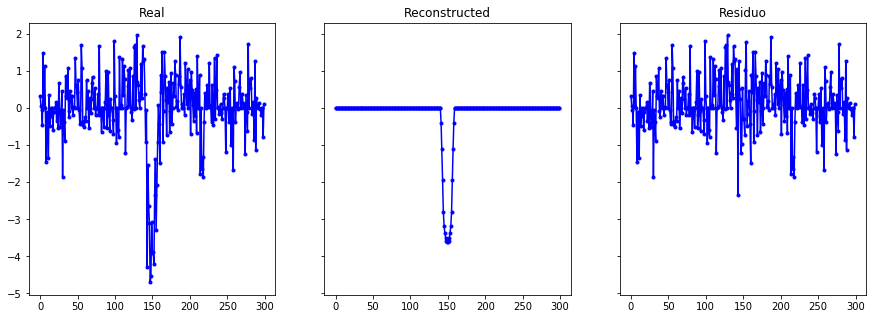

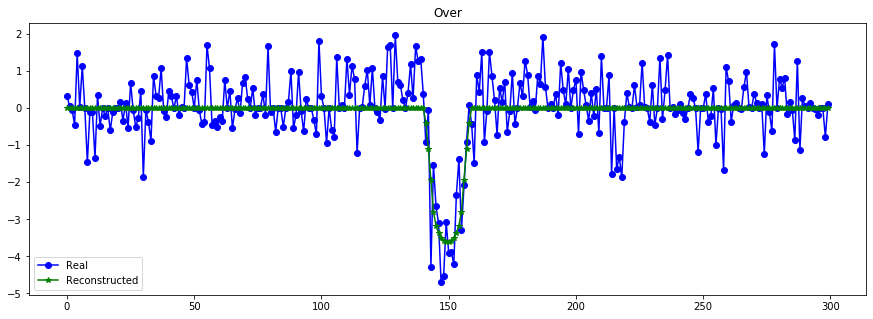

----------------------------------------------------------------


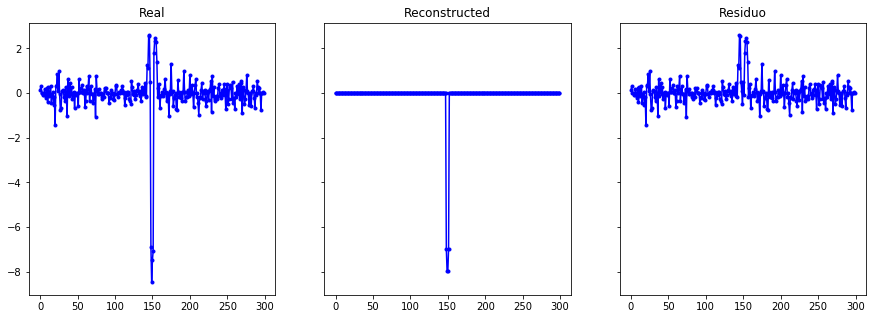

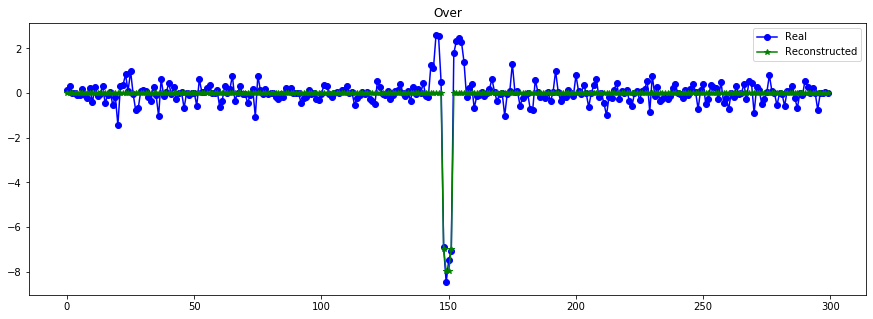

----------------------------------------------------------------


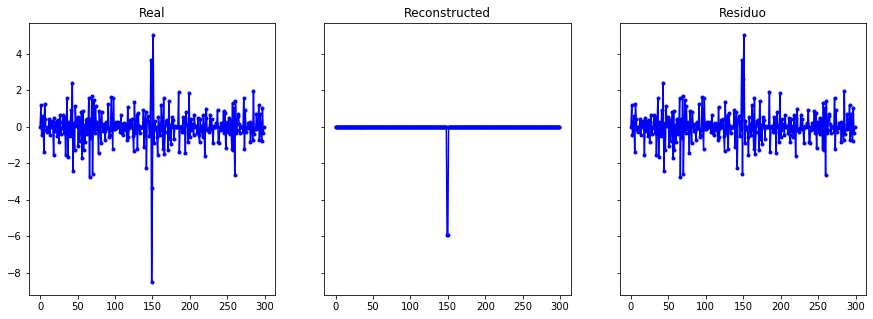

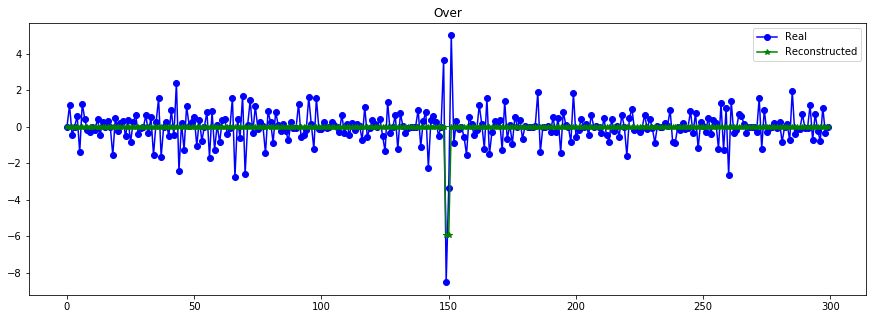

----------------------------------------------------------------


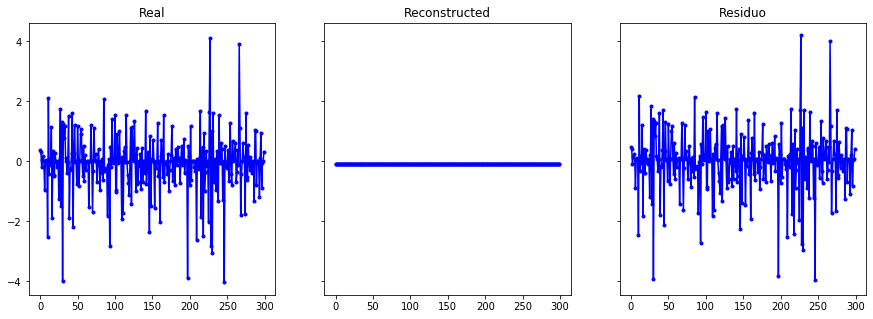

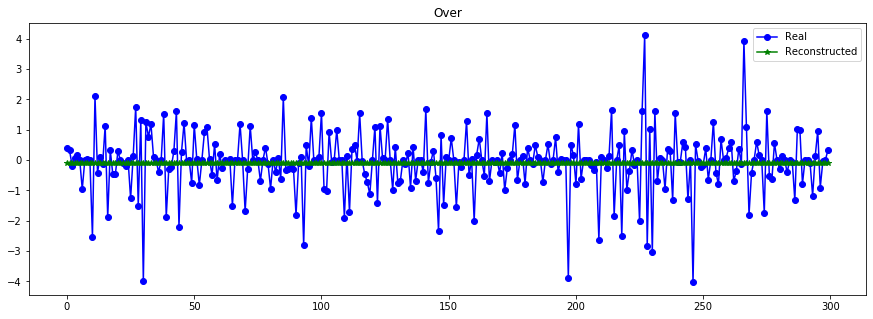

----------------------------------------------------------------


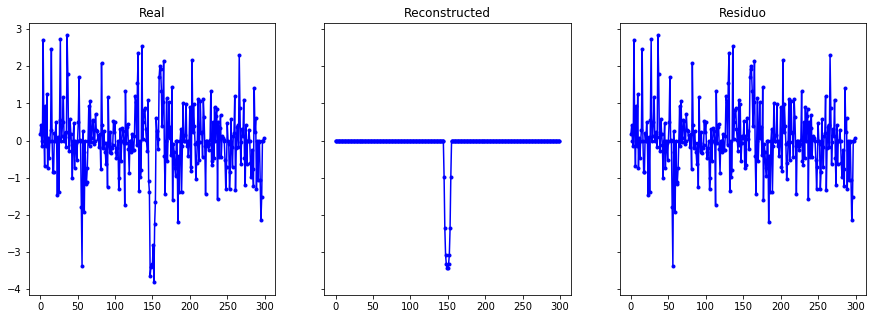

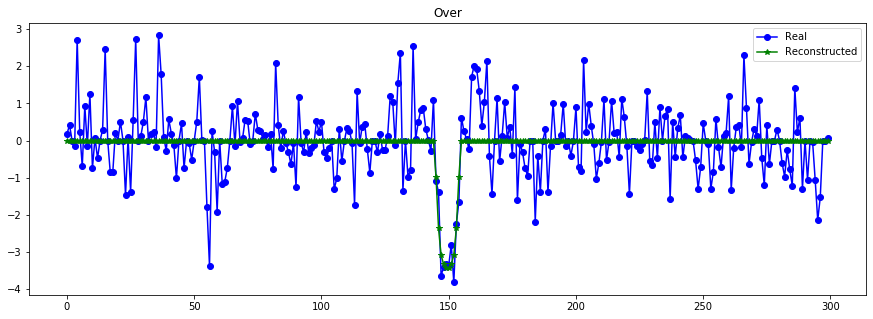

----------------------------------------------------------------


In [33]:
#mismo arriba pero fijo periodo y T0
X_fit_MA_eval = X_fit_MA/S_train

evaluate_reconst(X_lc_eval, X_fit_MA_eval)

plot_n_lc(X_lc_eval, X_fit_MA_eval, n= 15) 

In [ ]:
#PyLC solo con pior de limb dark y periodo y t0
X_fit_MA_eval = X_fit_MA/S_train

evaluate_reconst(X_lc_eval, X_fit_MA_eval)

plot_n_lc(X_lc_eval, X_fit_MA_eval, n= 15)